In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_15_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x      s1i  \
datetime                                                                        
2013-03-15 00:10:00  2013-03-15  00:10:00     600  14.22509  15.7811  12.3386   
2013-03-15 00:20:00  2013-03-15  00:20:00     600  14.84015  16.2860  13.2107   
2013-03-15 00:30:00  2013-03-15  00:30:00     600  15.10178  16.6073  13.1189   
2013-03-15 00:40:00  2013-03-15  00:40:00     600  14.94113  16.6073  13.1189   
2013-03-15 00:50:00  2013-03-15  00:50:00     600  15.45521  17.2040  13.7156   

                         s1s       s2a      s2x      s2i  ...  tii  vxa  vxx  \
datetime                                                  ...                  
2013-03-15 00:10:00  0.50031  14.07262  15.3670  12.4294  ...   48  126  126   
2013-03-15 00:20:00  0.49113  14.67391  16.0555  13.2097  ...   48  126  126   
2013-03-15 00:30:00  0.55998  14.96308  16.9276  12.9343  ...   48  126  126   
2013-03-15 00:40:00  0.59211  14.80243  16.6522  13.0720  ...   48  126  126   
2013-03-15 00:50:00  0.61965  15.28897  17.0194  13.1179  ...   48  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-15 00:10:00  126   83   83   83   83   83   83  
2013-03-15 00:20:00  126   83   83   83   83   83   83  
2013-03-15 00:30:00  126   83   83   83   83   83   83  
2013-03-15 00:40:00  126   83   83   83   83   83   83  
2013-03-15 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      12.500653
std        2.858030
min        6.619460
25%       10.943240
50%       11.886485
75%       15.260135
max       17.217770
Name: s1a, dtype: float64


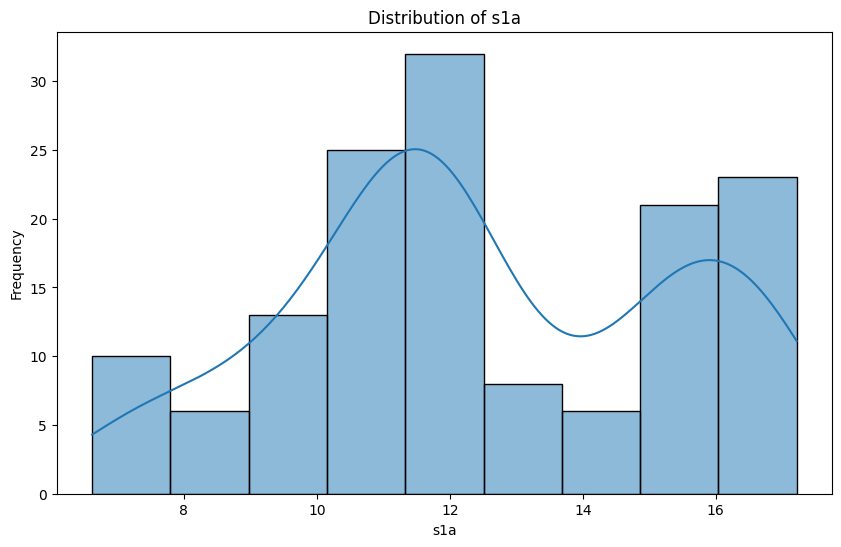


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      14.707231
std        3.640474
min        7.932200
25%       12.453350
50%       13.991000
75%       17.823650
max       21.885800
Name: s1x, dtype: float64


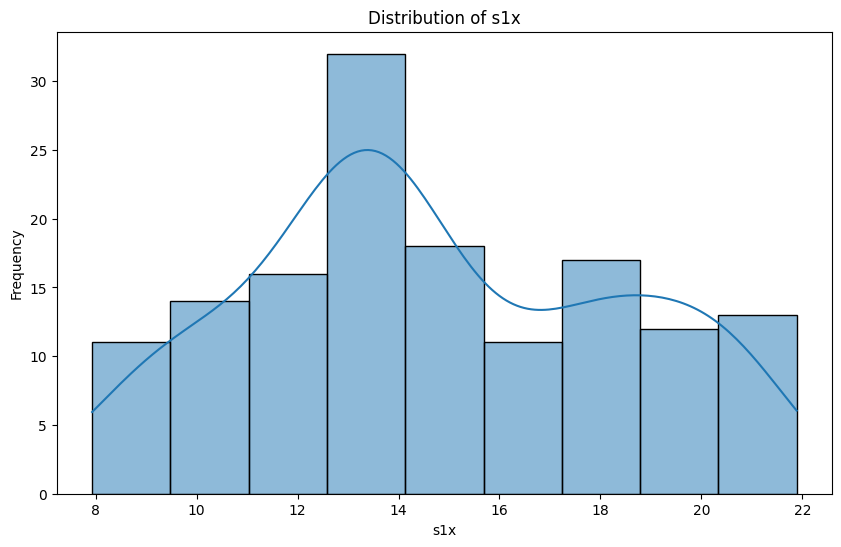


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean      10.103525
std        2.346851
min        4.902800
25%        8.987900
50%        9.814100
75%       12.223850
max       14.541800
Name: s1i, dtype: float64


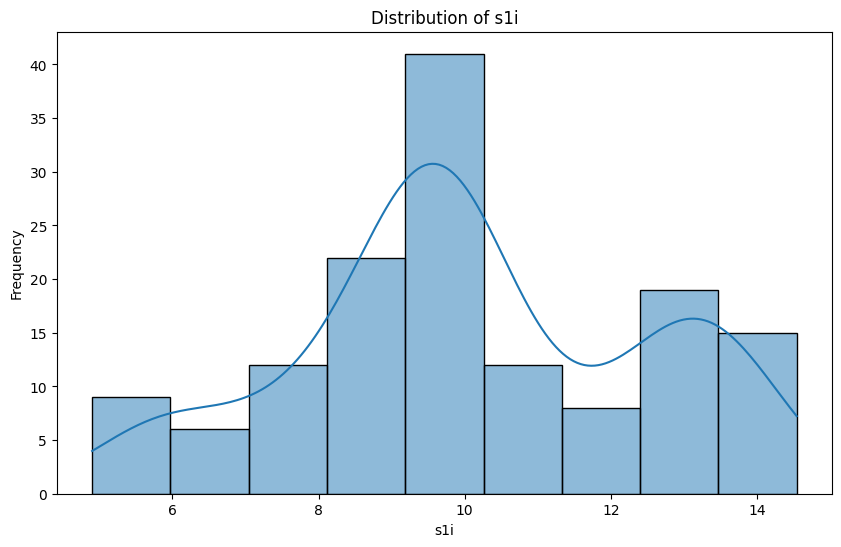


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.796333
std        0.349480
min        0.169830
25%        0.540473
50%        0.771120
75%        1.051110
max        1.771740
Name: s1s, dtype: float64


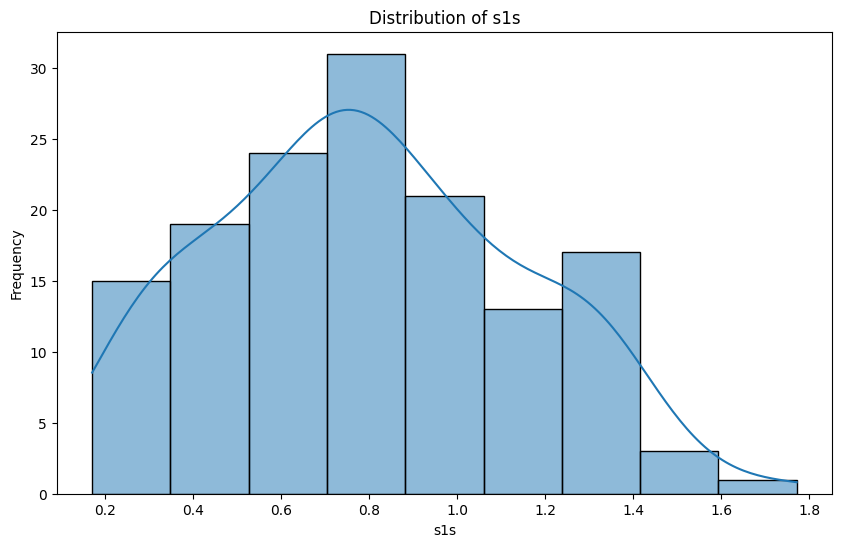


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean      12.376997
std        2.833554
min        6.586330
25%       10.787327
50%       11.738605
75%       15.114550
max       17.083660
Name: s2a, dtype: float64


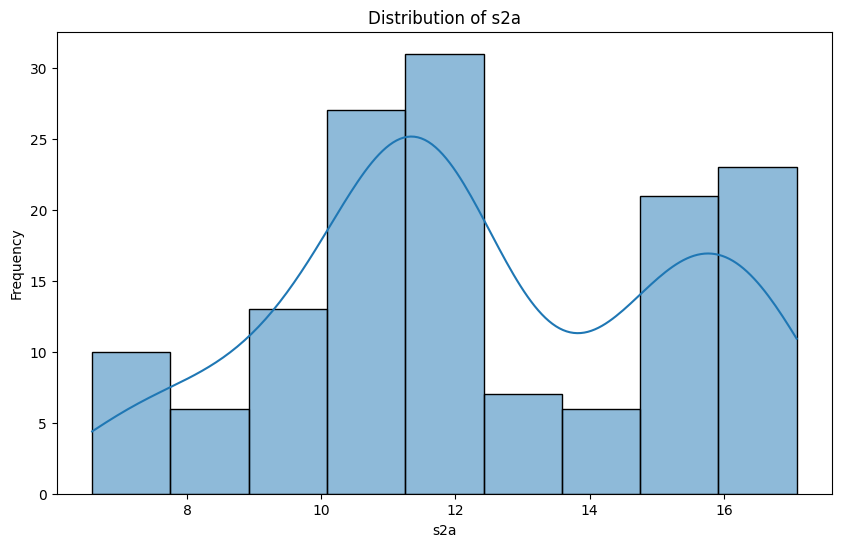


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      14.586700
std        3.645476
min        7.747600
25%       12.314650
50%       13.852300
75%       17.811175
max       21.609400
Name: s2x, dtype: float64


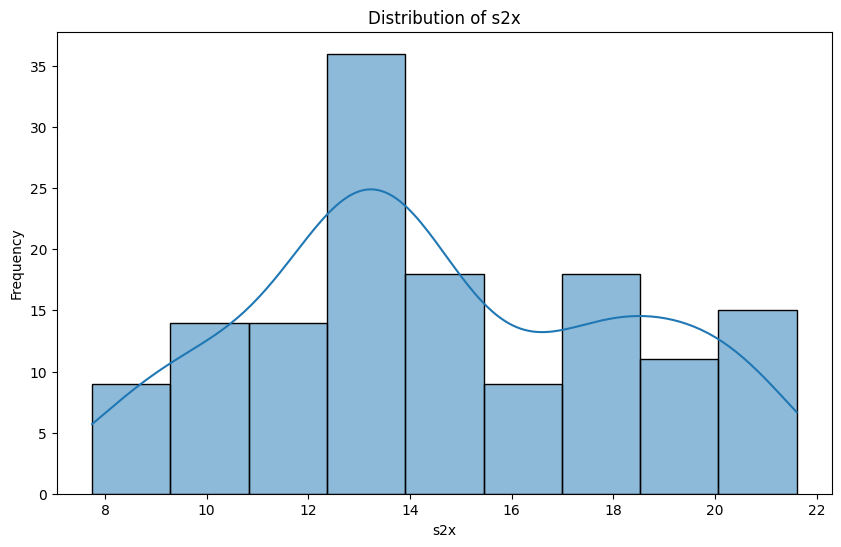


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       9.939644
std        2.350433
min        4.855900
25%        8.837725
50%        9.606550
75%       12.108100
max       14.403100
Name: s2i, dtype: float64


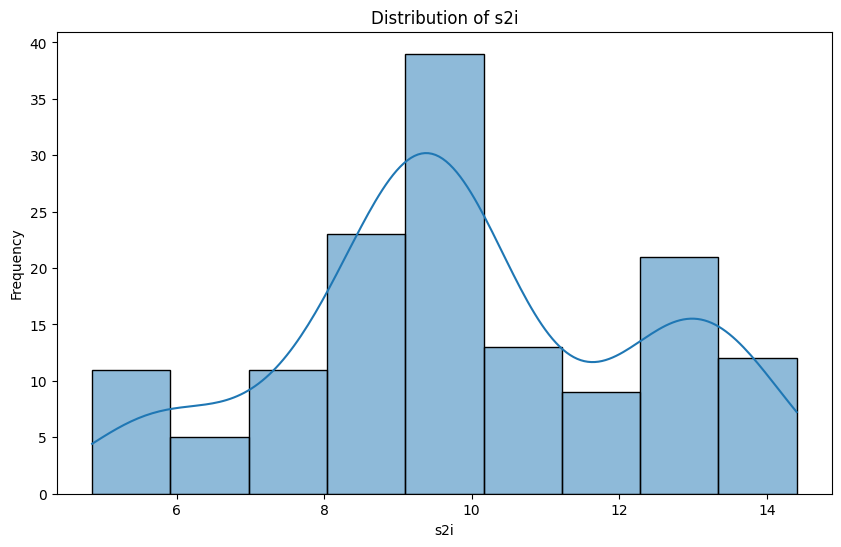


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.799329
std        0.350961
min        0.169830
25%        0.547357
50%        0.782595
75%        1.030455
max        1.803870
Name: s2s, dtype: float64


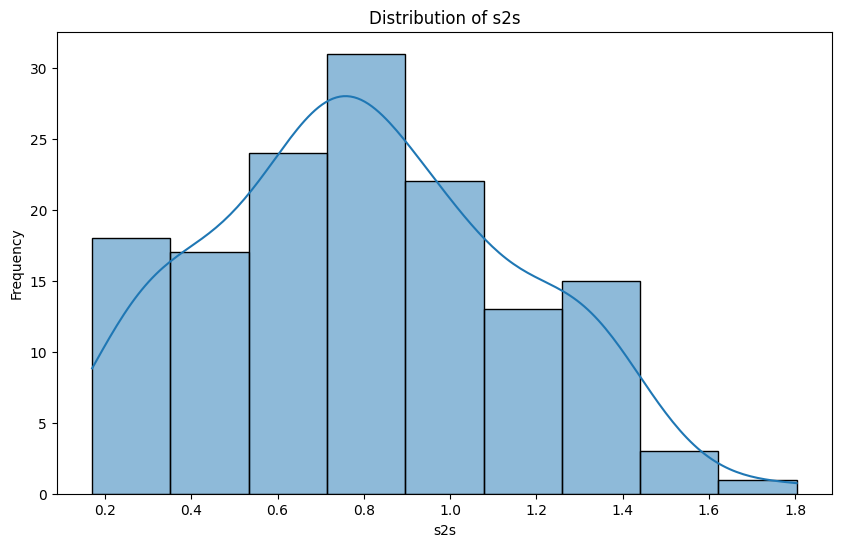


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean      11.371736
std        2.638275
min        6.172340
25%        9.776573
50%       10.832730
75%       13.910610
max       16.016040
Name: s3a, dtype: float64


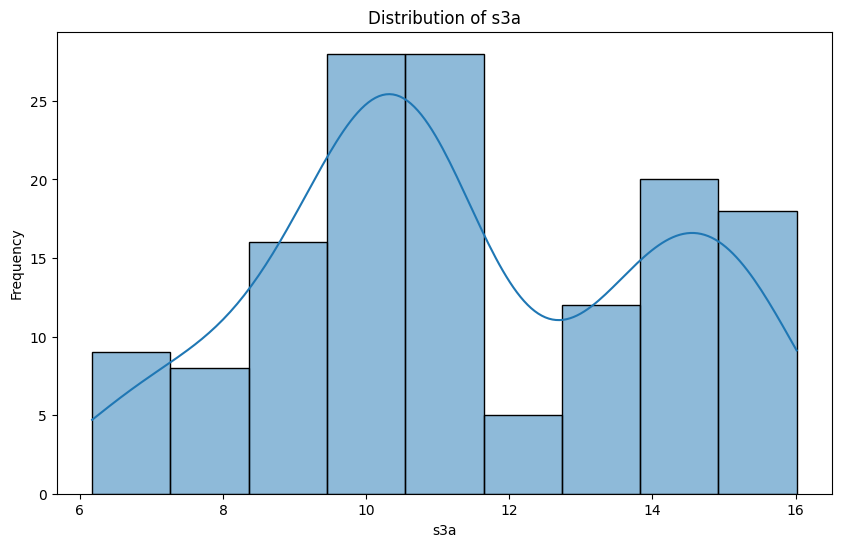


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      13.690305
std        3.401993
min        7.378720
25%       11.277670
50%       13.066600
75%       16.610057
max       20.084710
Name: s3x, dtype: float64


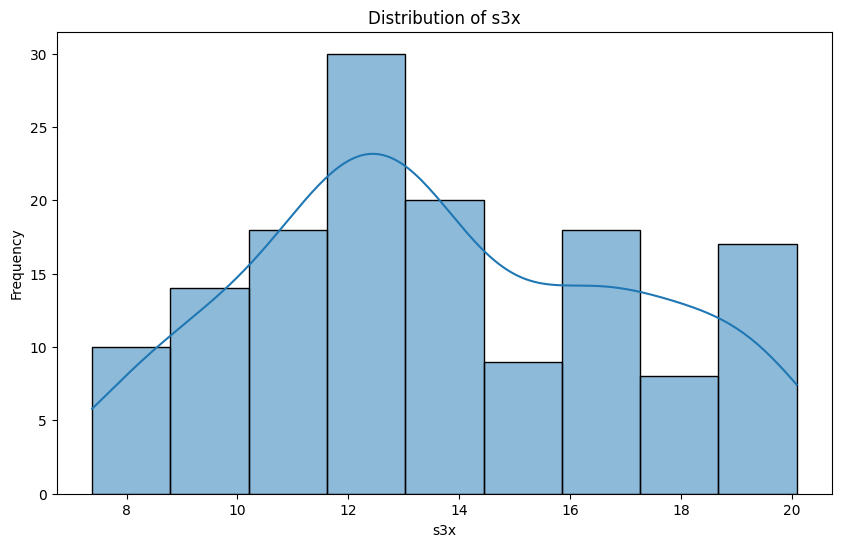


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       8.823625
std        2.162626
min        4.534780
25%        7.504862
50%        8.387860
75%       10.818970
max       13.112470
Name: s3i, dtype: float64


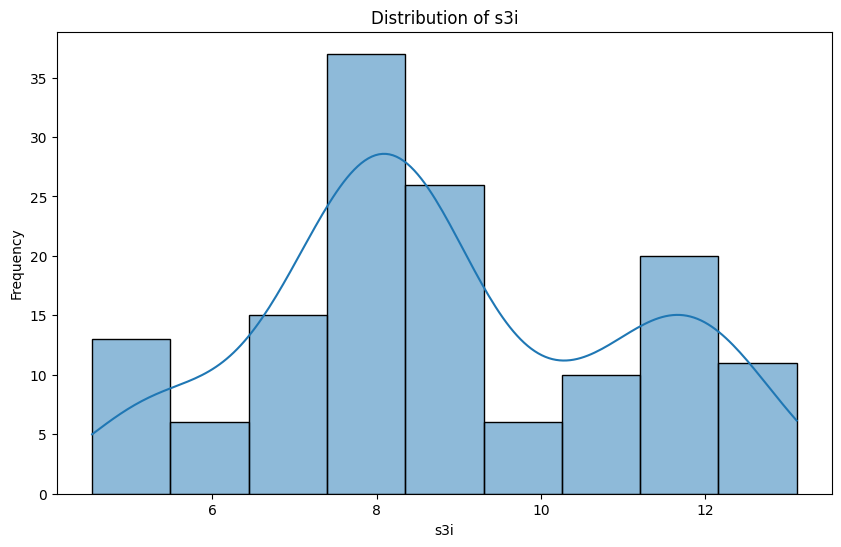


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.853310
std        0.348306
min        0.201830
25%        0.582550
50%        0.814195
75%        1.068770
max        1.747650
Name: s3s, dtype: float64


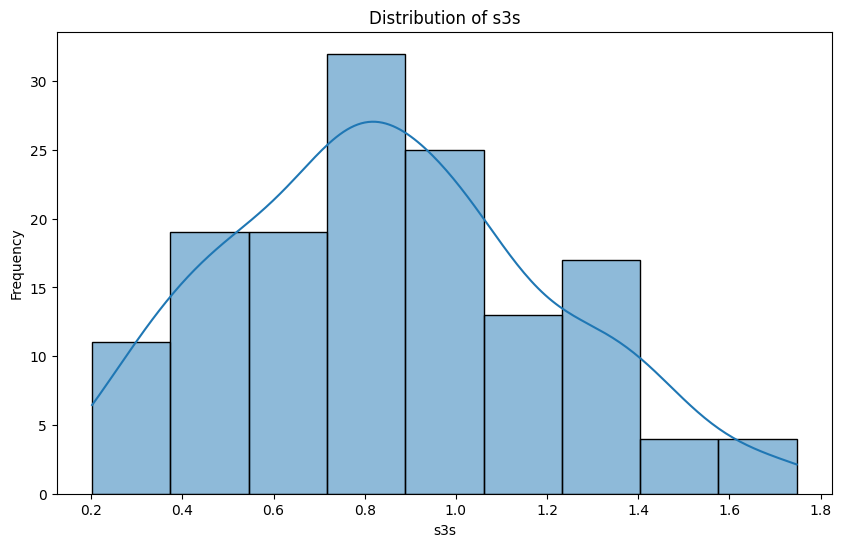


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     133.569444
std      146.555875
min        4.000000
25%       21.000000
50%       29.000000
75%      315.000000
max      360.000000
Name: d1a, dtype: float64


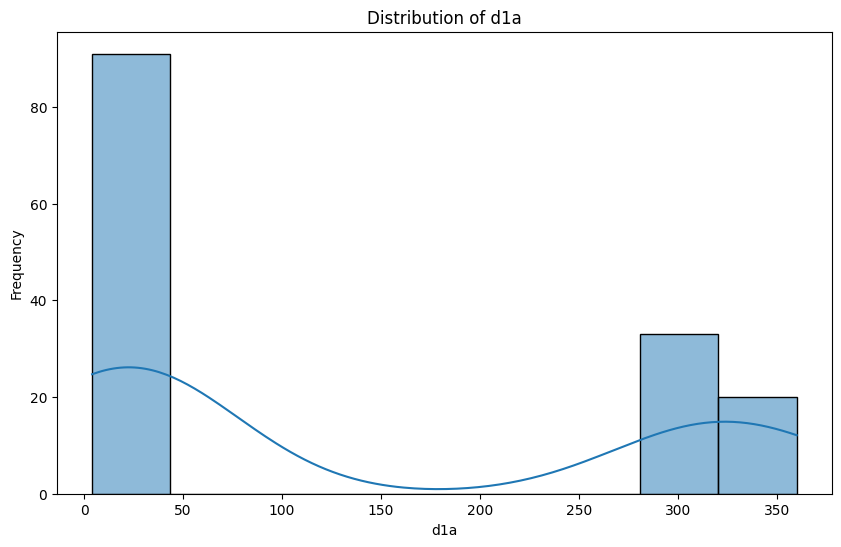


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       3.736111
std        1.070822
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        7.000000
Name: d1s, dtype: float64


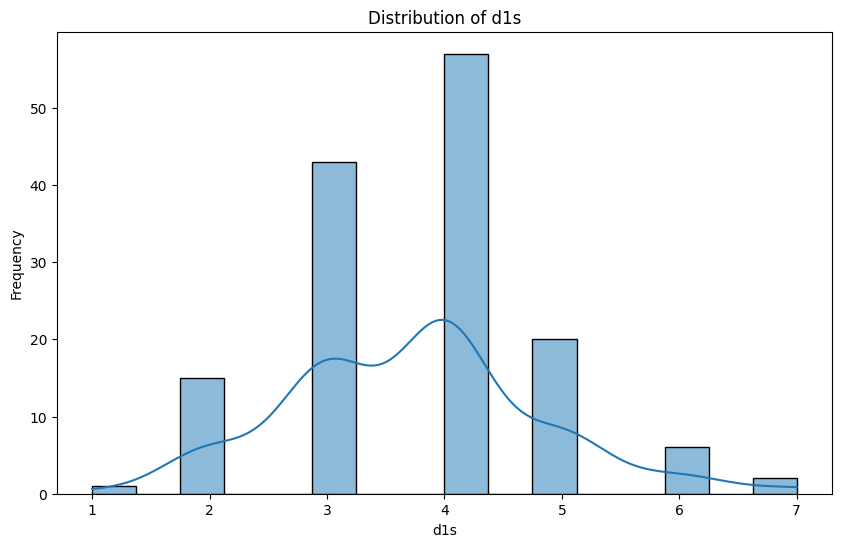


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     157.013889
std      153.592959
min        1.000000
25%       19.000000
50%       32.500000
75%      313.000000
max      360.000000
Name: d2a, dtype: float64


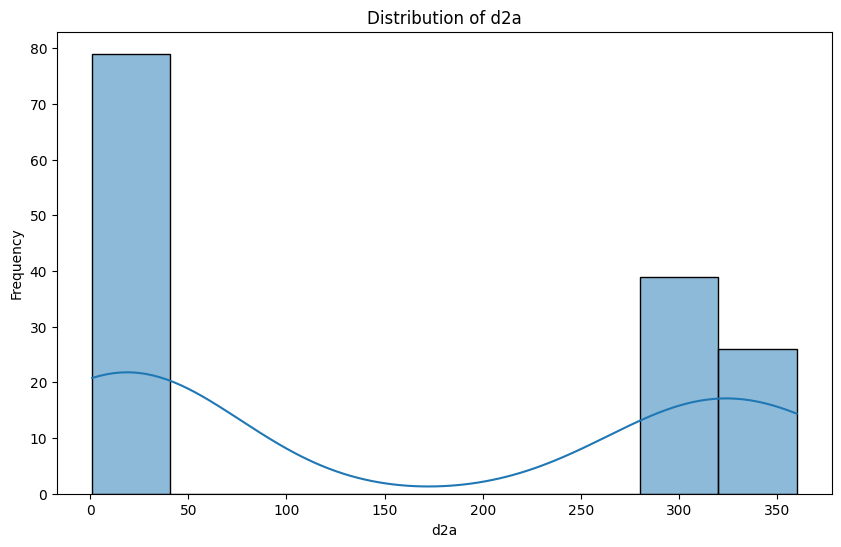


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.777778
std        1.623449
min        3.000000
25%        5.000000
50%        5.000000
75%        6.250000
max       11.000000
Name: d2s, dtype: float64


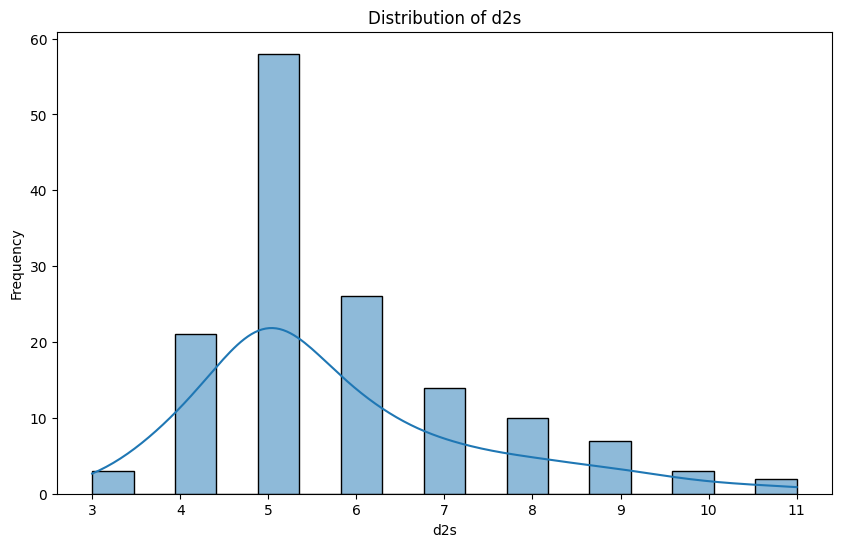


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      81.215278
std        9.419637
min       63.000000
25%       76.000000
50%       81.000000
75%       87.500000
max       97.000000
Name: h1a, dtype: float64


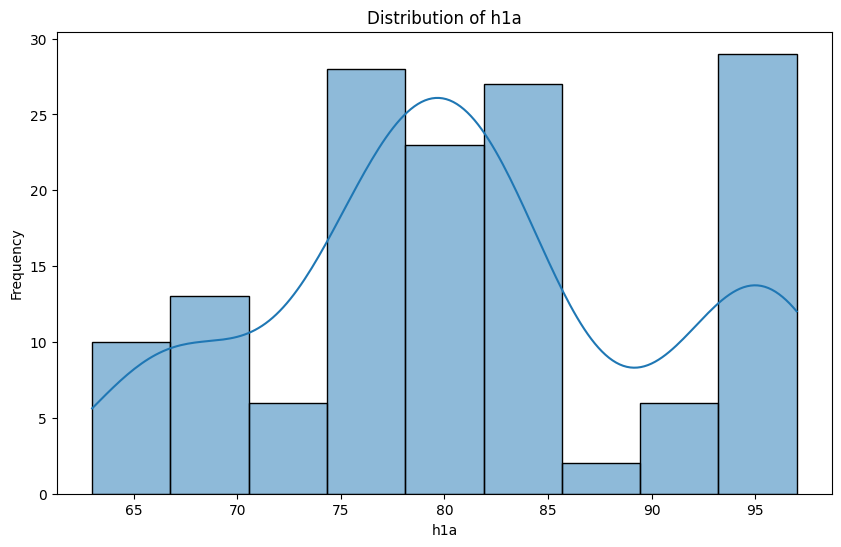


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      82.173611
std        9.153187
min       64.000000
25%       78.000000
50%       81.500000
75%       89.250000
max       97.000000
Name: h1x, dtype: float64


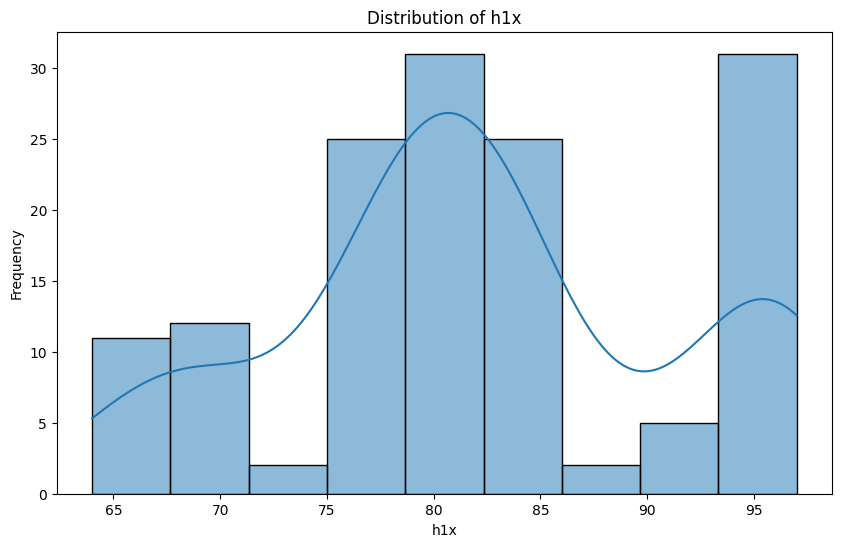


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      80.291667
std        9.736296
min       62.000000
25%       75.000000
50%       79.500000
75%       86.750000
max       96.000000
Name: h1i, dtype: float64


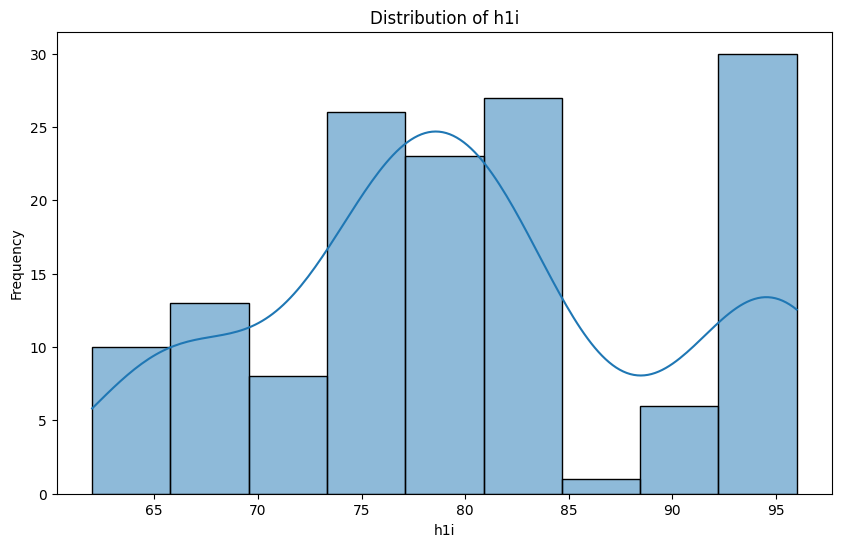


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean      10.756944
std        1.917955
min        8.750000
25%        9.125000
50%        9.950000
75%       12.175000
max       14.950000
Name: t1a, dtype: float64


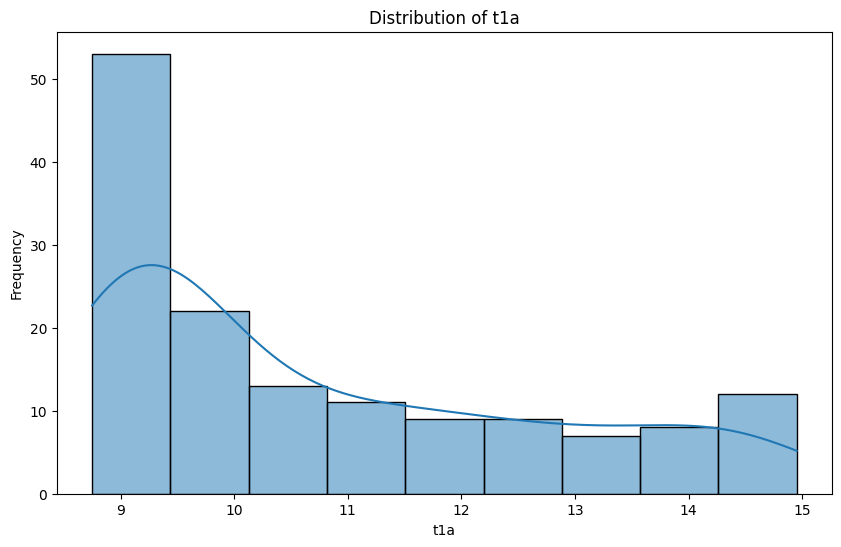


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean      10.913194
std        1.958940
min        8.850000
25%        9.250000
50%       10.200000
75%       12.350000
max       15.150000
Name: t1x, dtype: float64


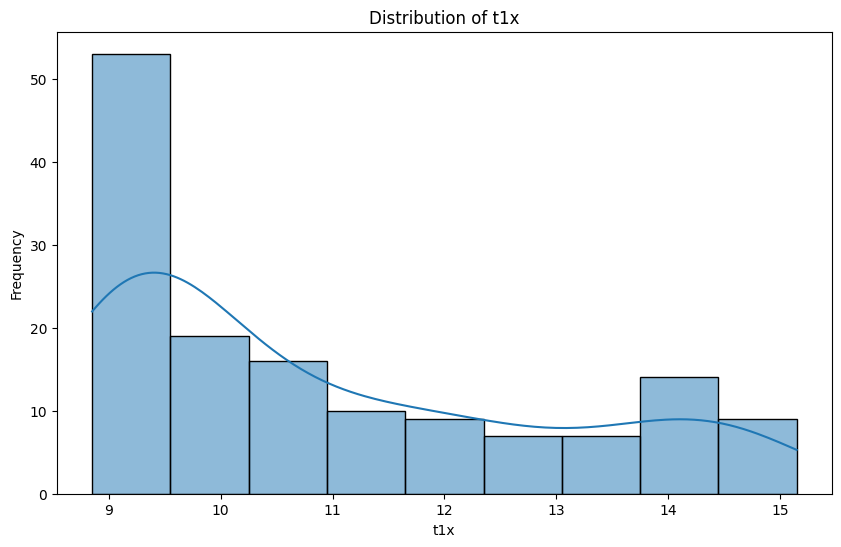


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean      10.606944
std        1.882405
min        8.550000
25%        8.950000
50%        9.800000
75%       11.975000
max       14.850000
Name: t1i, dtype: float64


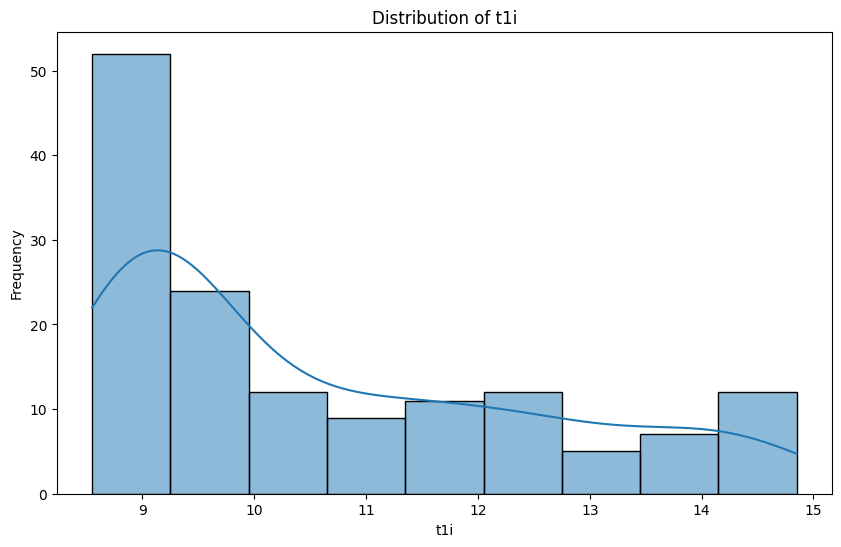


Analysis for column: b1a
Descriptive Statistics:
count    144.000000
mean     996.631944
std        1.250155
min      994.000000
25%      996.000000
50%      996.000000
75%      998.000000
max      999.000000
Name: b1a, dtype: float64


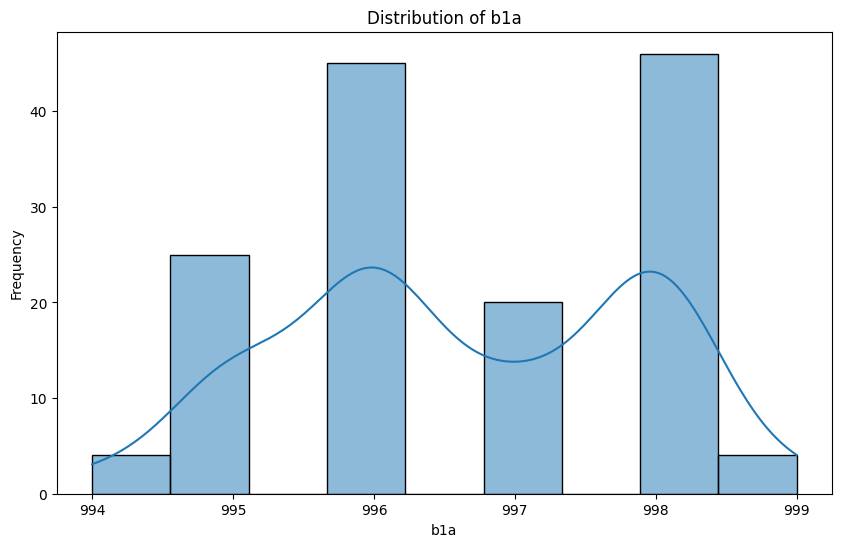


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean      996.958333
std         1.250874
min       995.000000
25%       996.000000
50%       997.000000
75%       998.000000
max      1000.000000
Name: b1x, dtype: float64


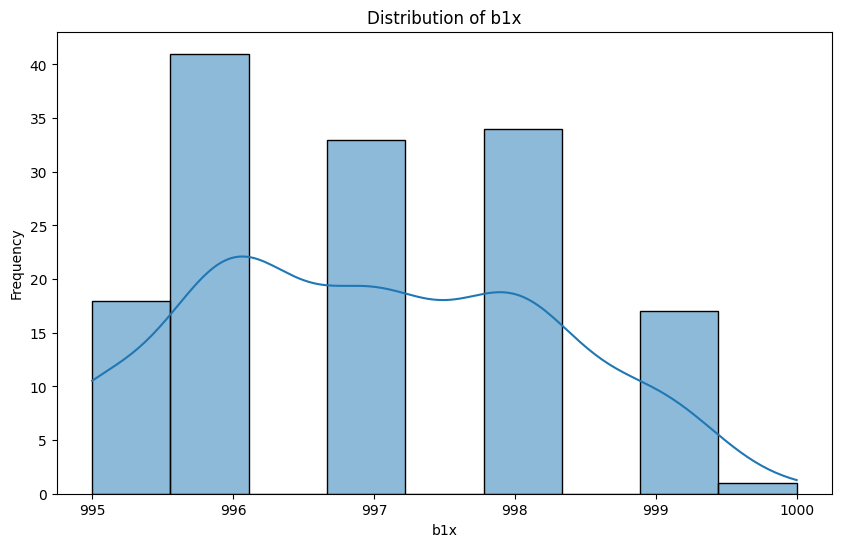


Analysis for column: b1i
Descriptive Statistics:
count    144.00000
mean     996.25000
std        1.35099
min      994.00000
25%      995.00000
50%      996.00000
75%      997.00000
max      999.00000
Name: b1i, dtype: float64


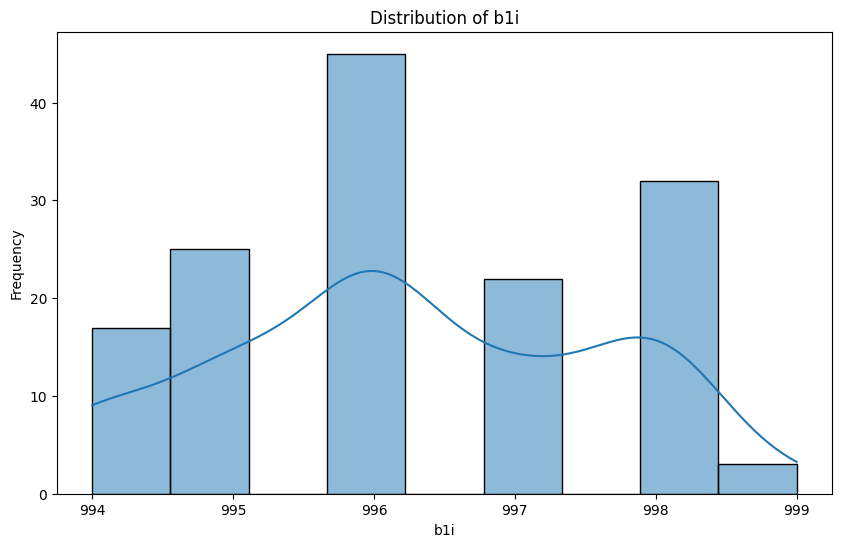


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       9.660493
std        2.405316
min        5.344860
25%        7.956022
50%        9.269620
75%       11.904850
max       13.964660
Name: p1a, dtype: float64


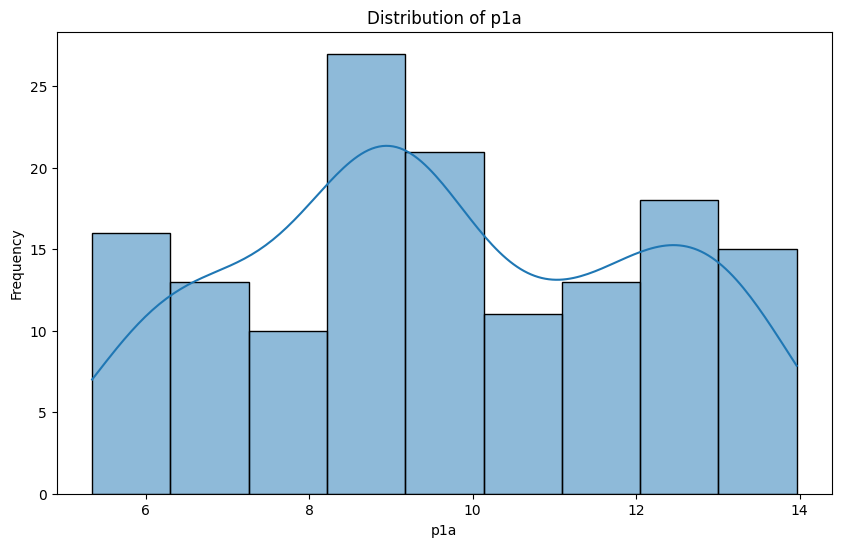


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      12.304699
std        3.217977
min        6.647000
25%        9.971125
50%       12.103150
75%       14.945850
max       18.751400
Name: p1x, dtype: float64


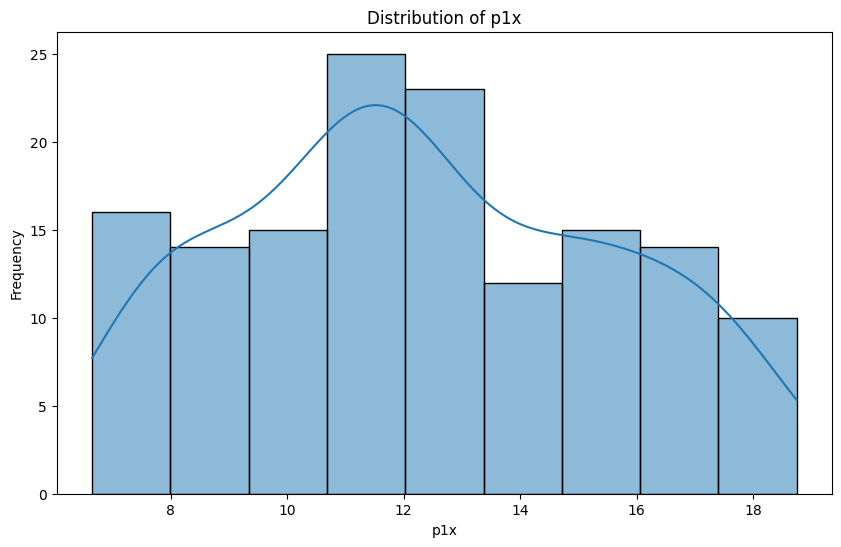


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       6.751436
std        1.617960
min        3.070700
25%        5.833163
50%        6.692850
75%        7.816175
max       10.727650
Name: p1i, dtype: float64


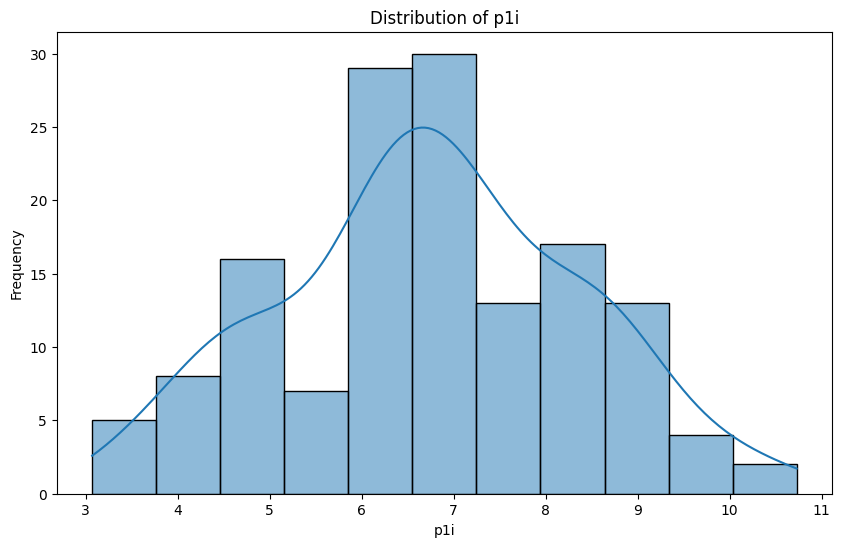


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.977722
std        0.358990
min        0.458500
25%        0.691192
50%        0.900955
75%        1.161155
max        1.911950
Name: p1s, dtype: float64


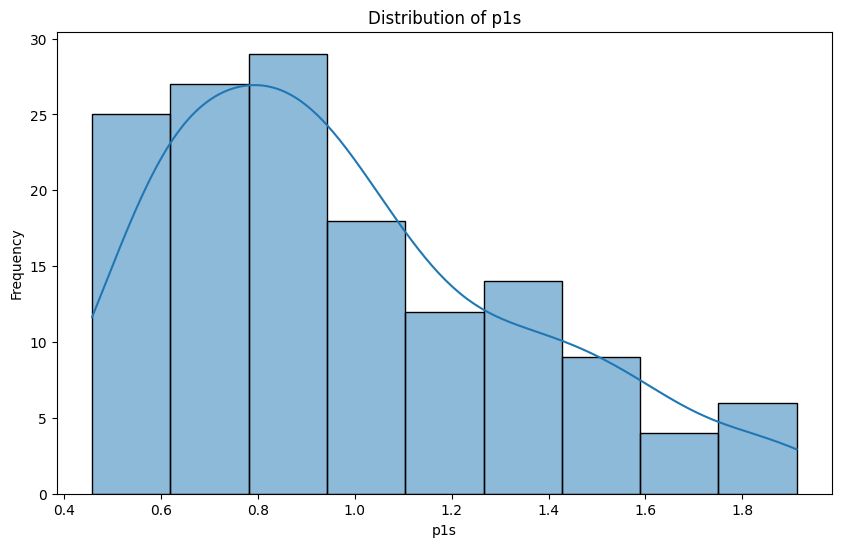


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      50.388889
std        2.174587
min       48.000000
25%       48.000000
50%       50.000000
75%       52.000000
max       54.000000
Name: tia, dtype: float64


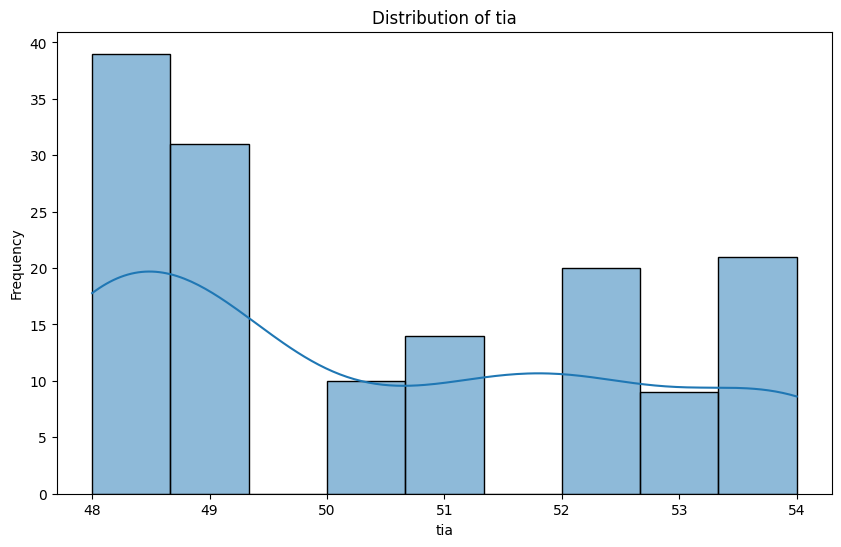


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      50.430556
std        2.173112
min       48.000000
25%       48.750000
50%       50.000000
75%       52.000000
max       54.000000
Name: tix, dtype: float64


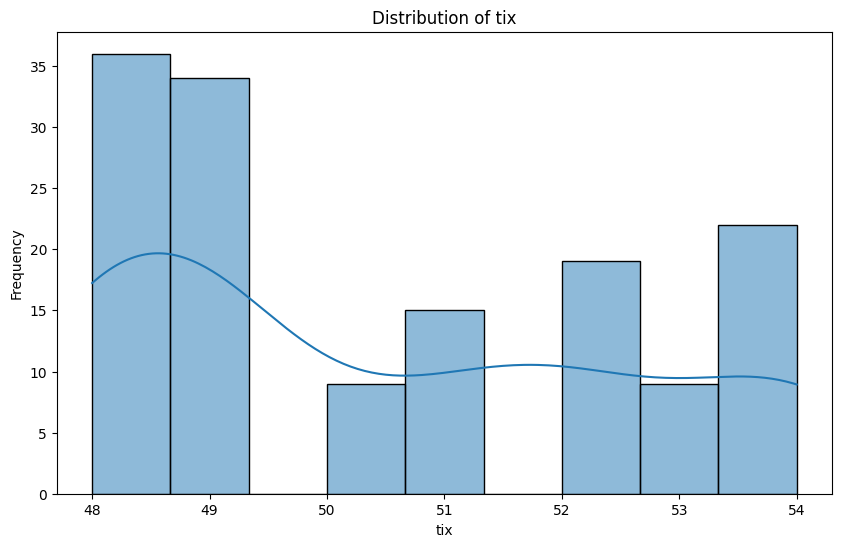


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      50.333333
std        2.161326
min       48.000000
25%       48.000000
50%       49.500000
75%       52.000000
max       54.000000
Name: tii, dtype: float64


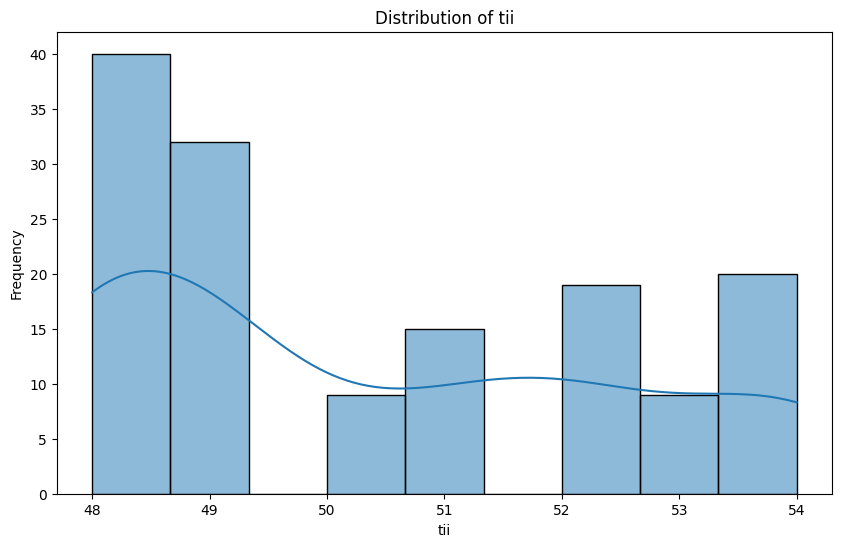


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     129.472222
std        4.496999
min      125.000000
25%      126.000000
50%      127.000000
75%      135.000000
max      137.000000
Name: vxa, dtype: float64


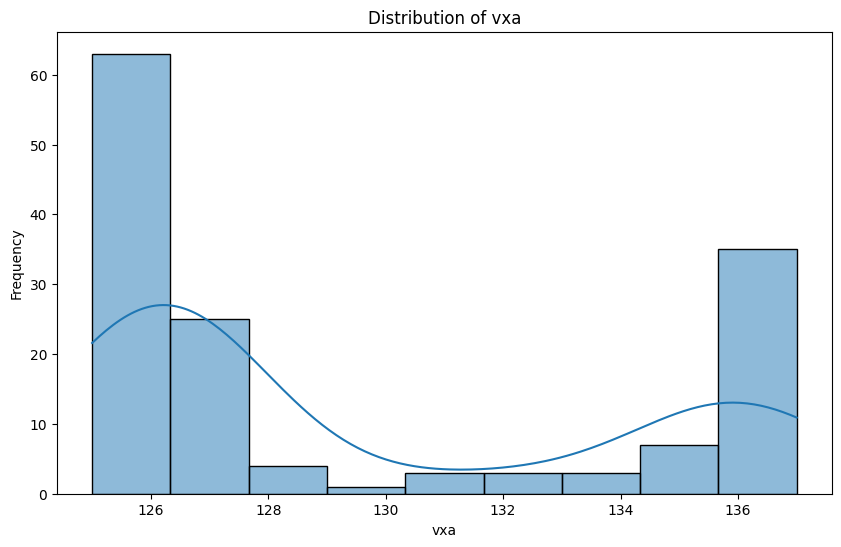


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     129.875000
std        4.770063
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      139.000000
Name: vxx, dtype: float64


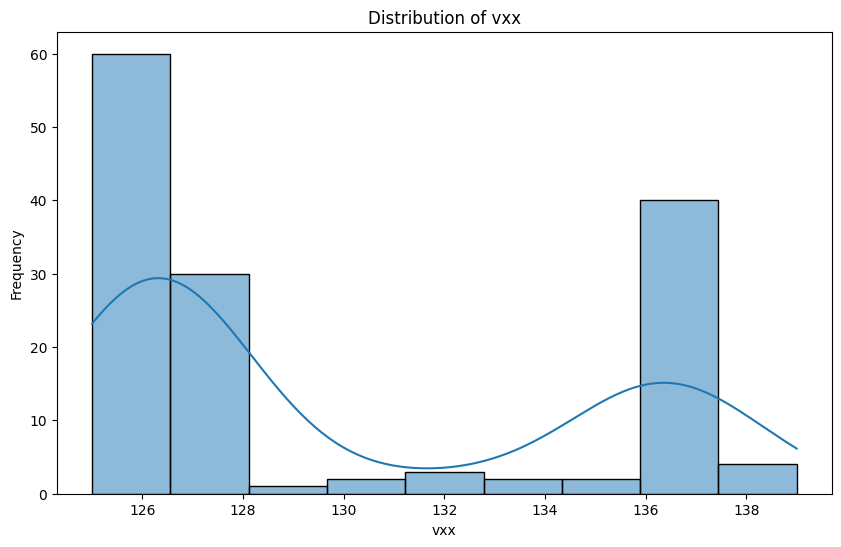


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.180556
std        4.351116
min      125.000000
25%      126.000000
50%      127.000000
75%      134.250000
max      137.000000
Name: vxi, dtype: float64


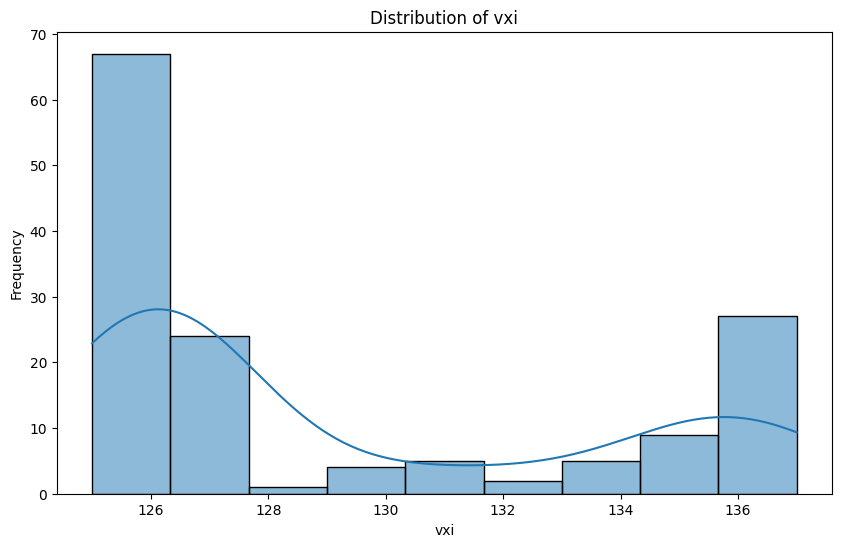


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


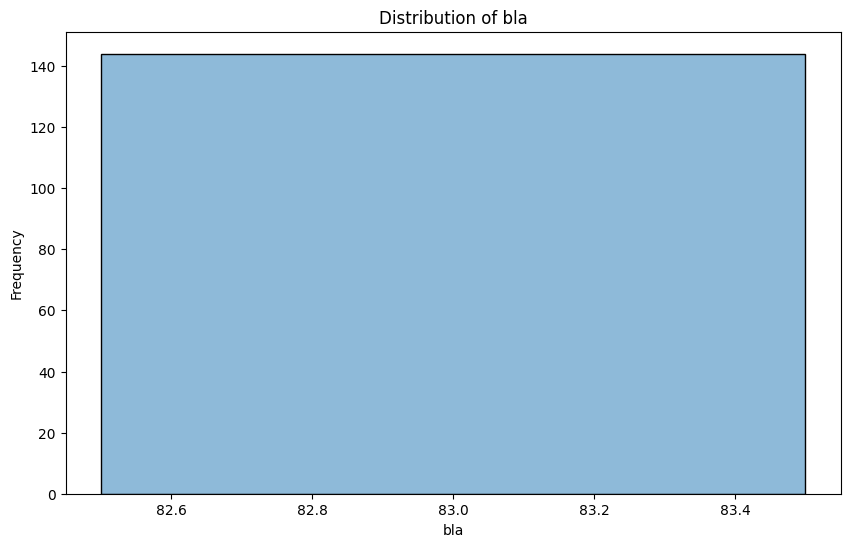


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


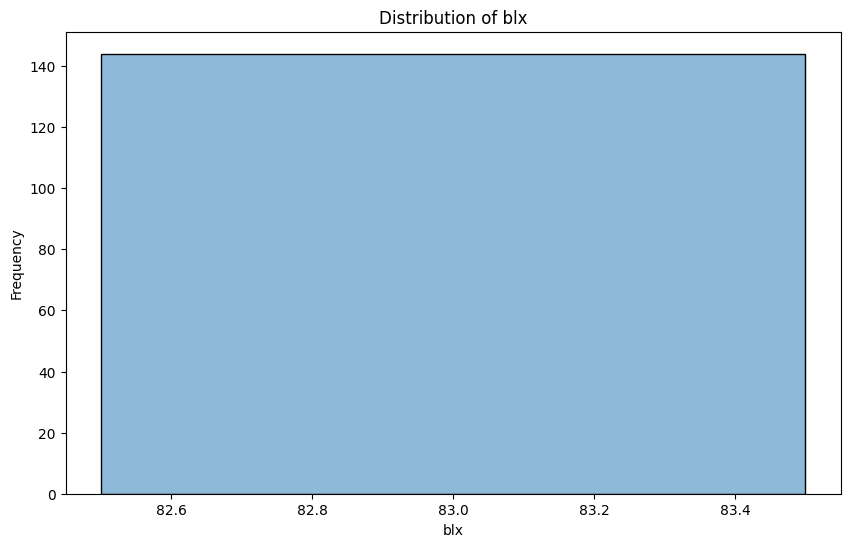


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.972222
std        0.164909
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


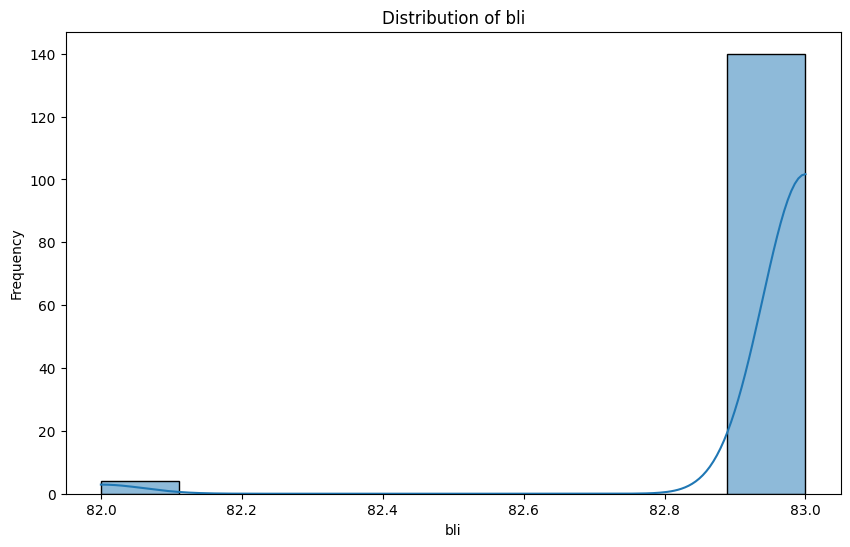


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


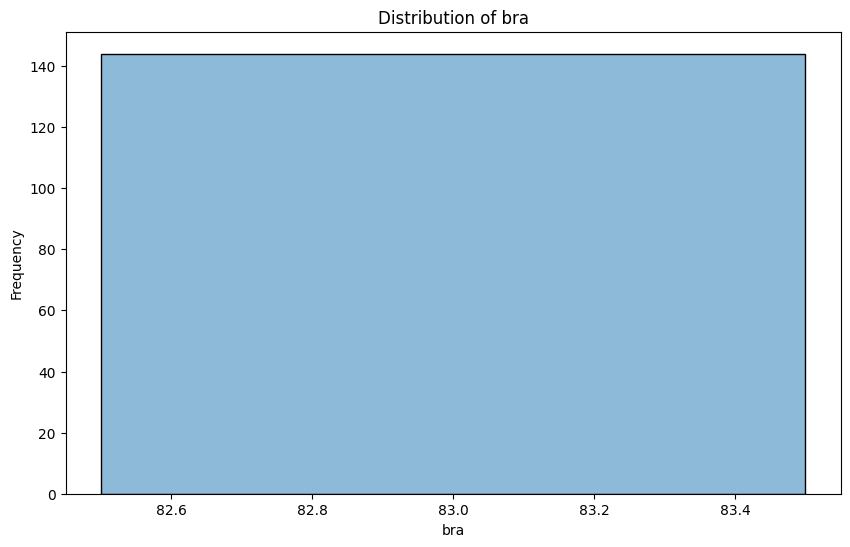


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


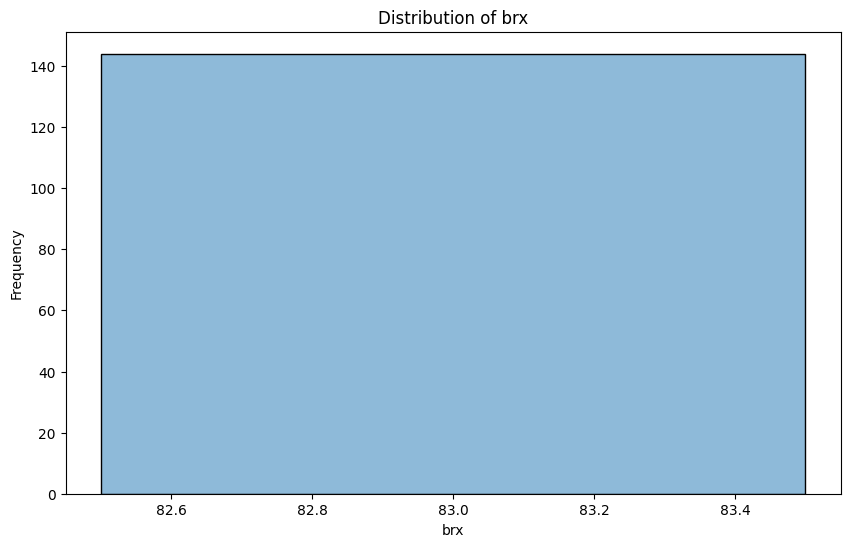


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


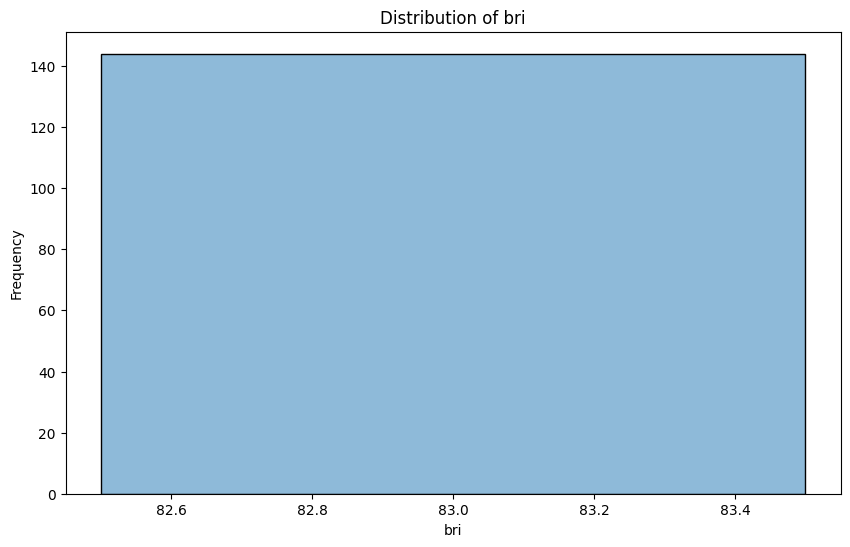

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

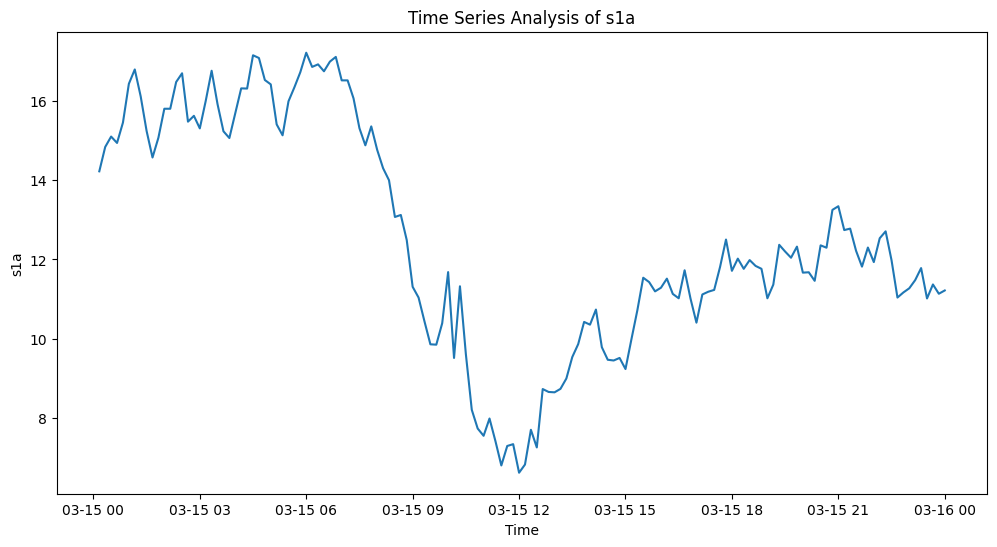

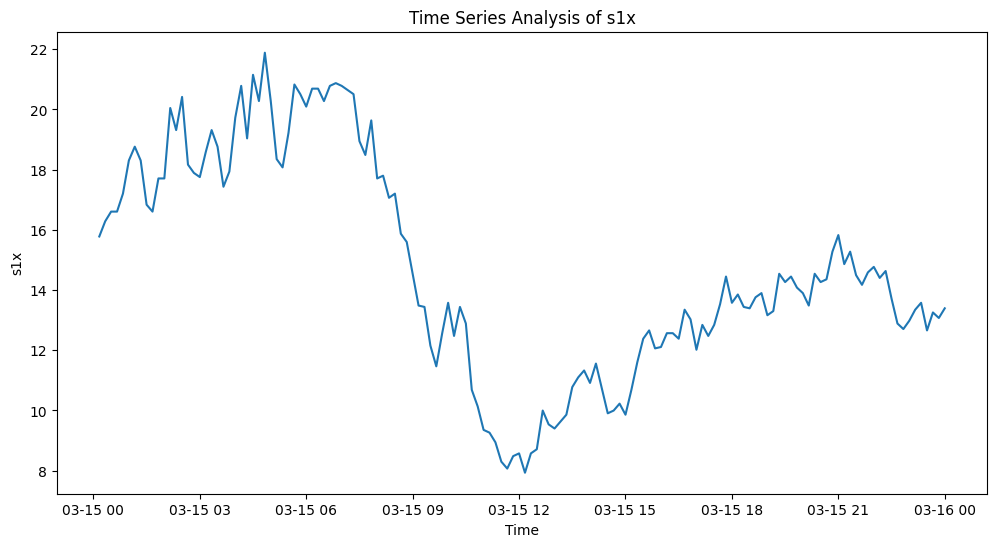

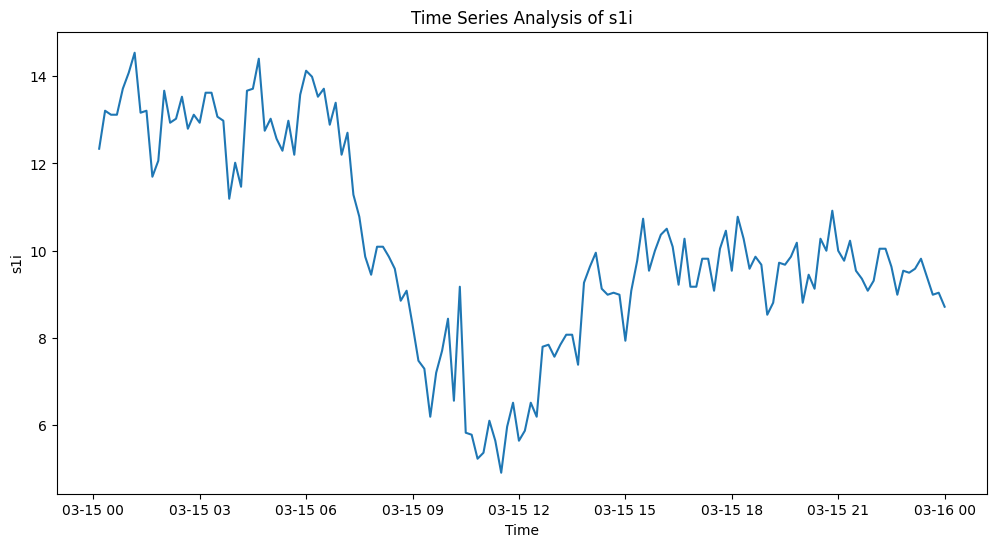

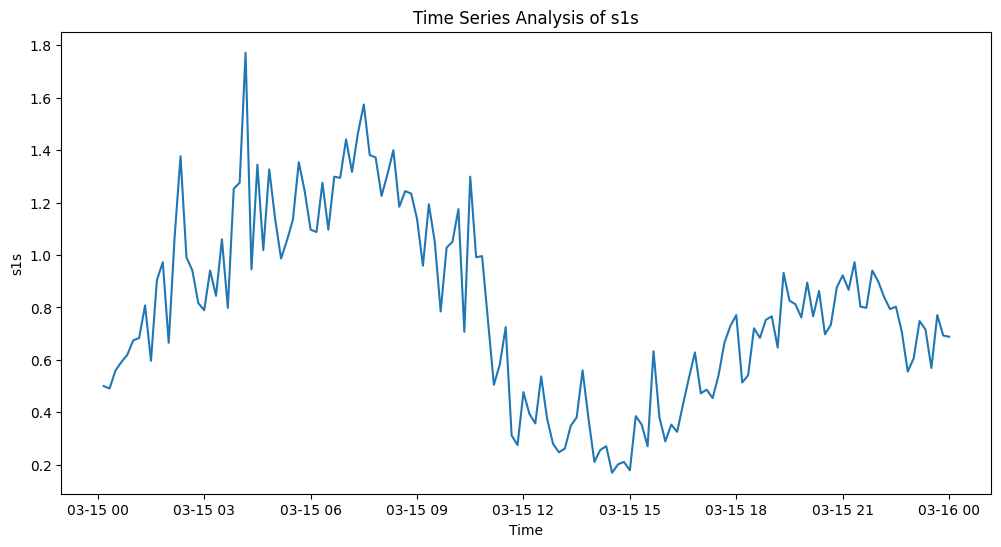

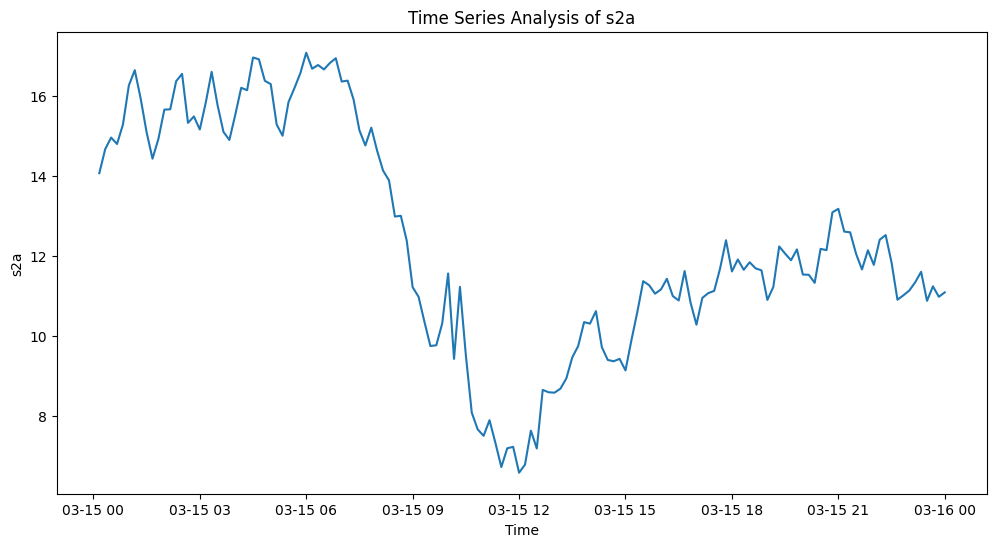

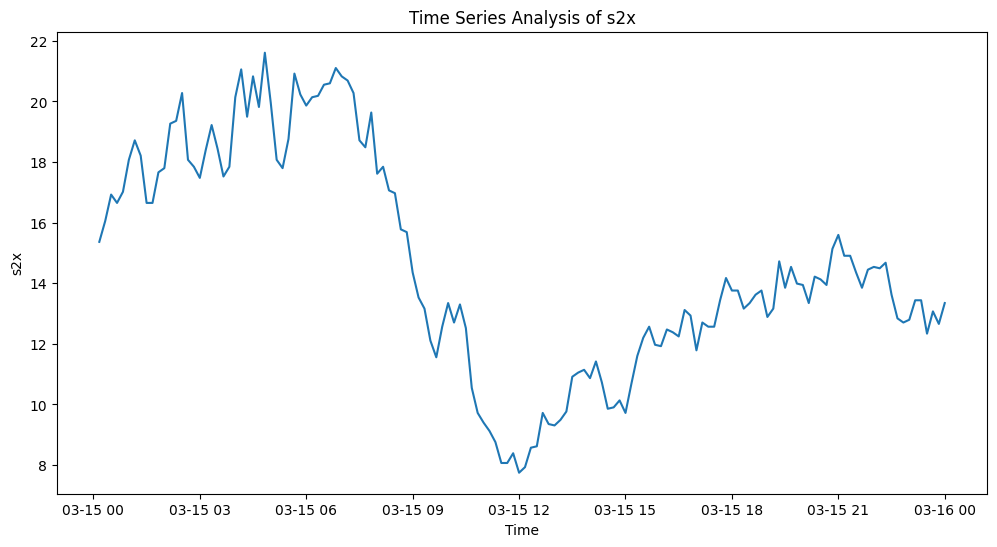

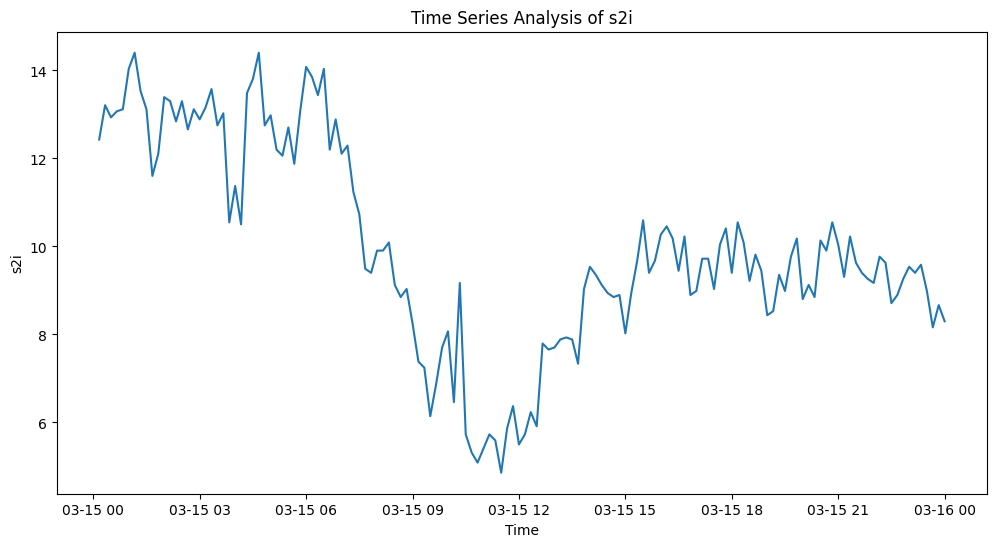

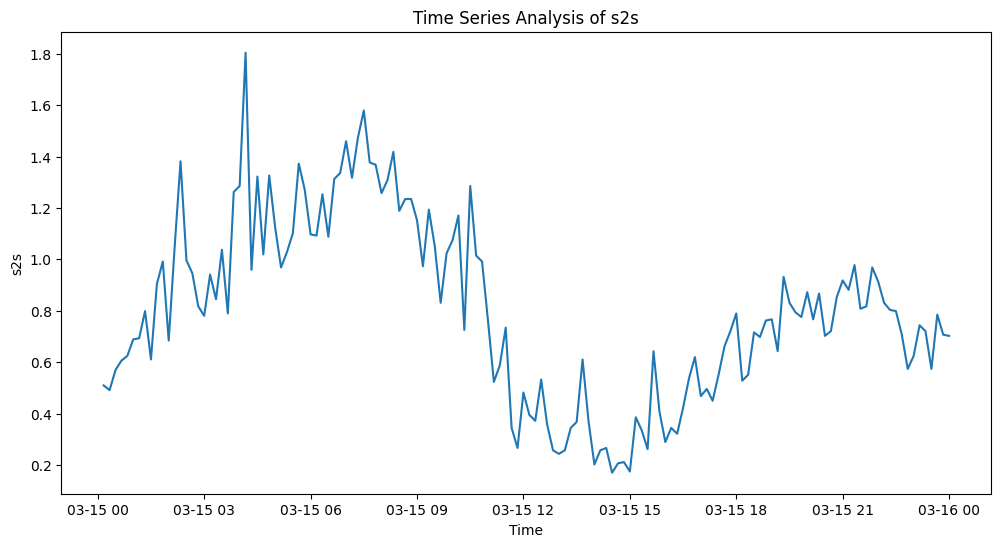

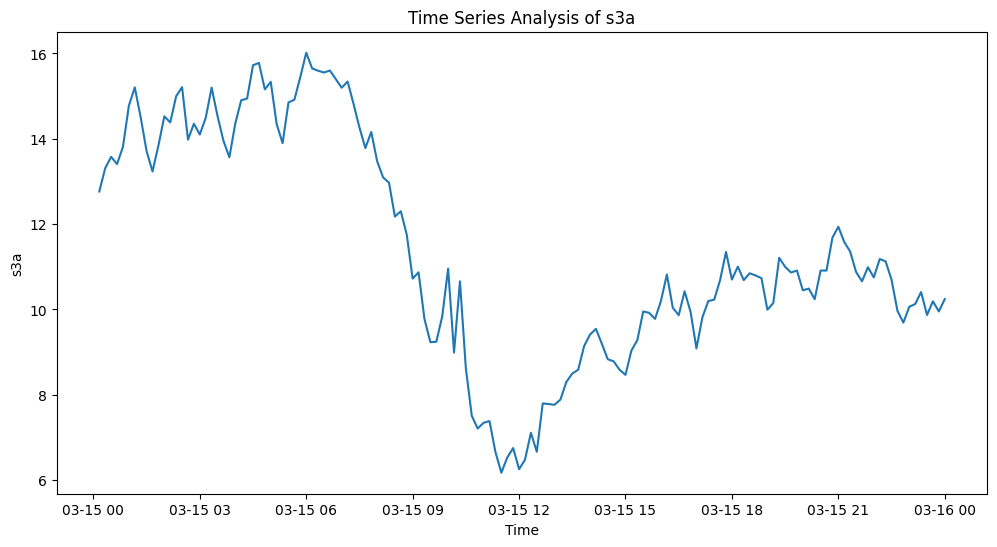

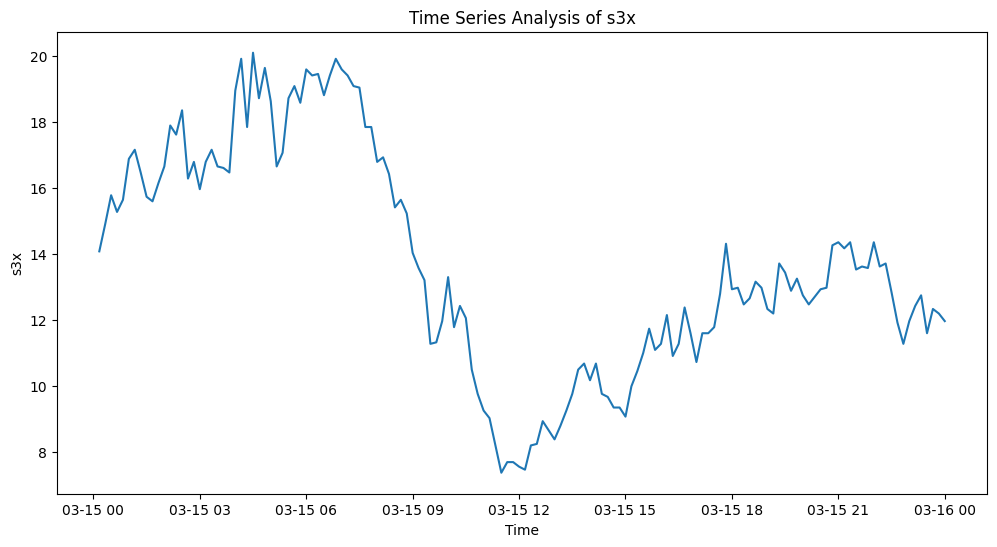

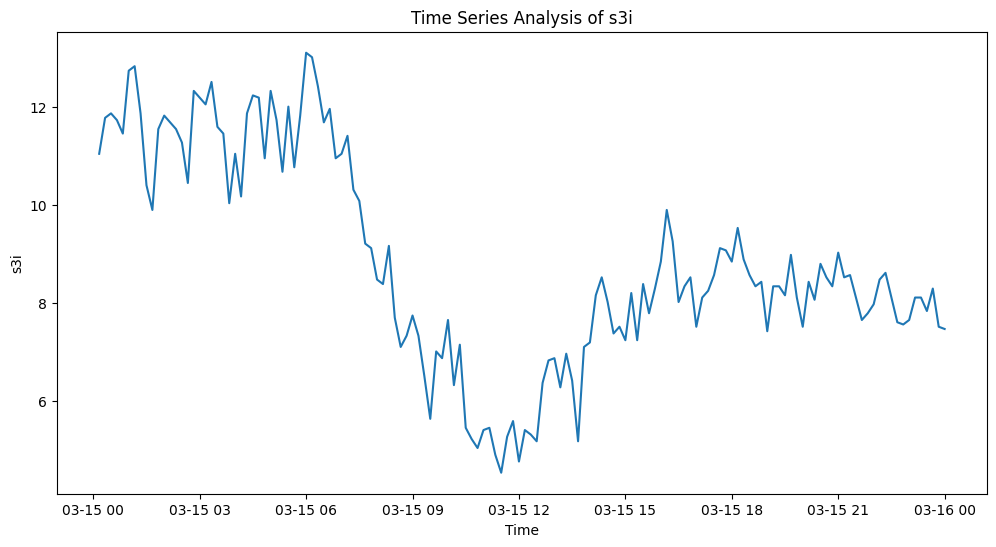

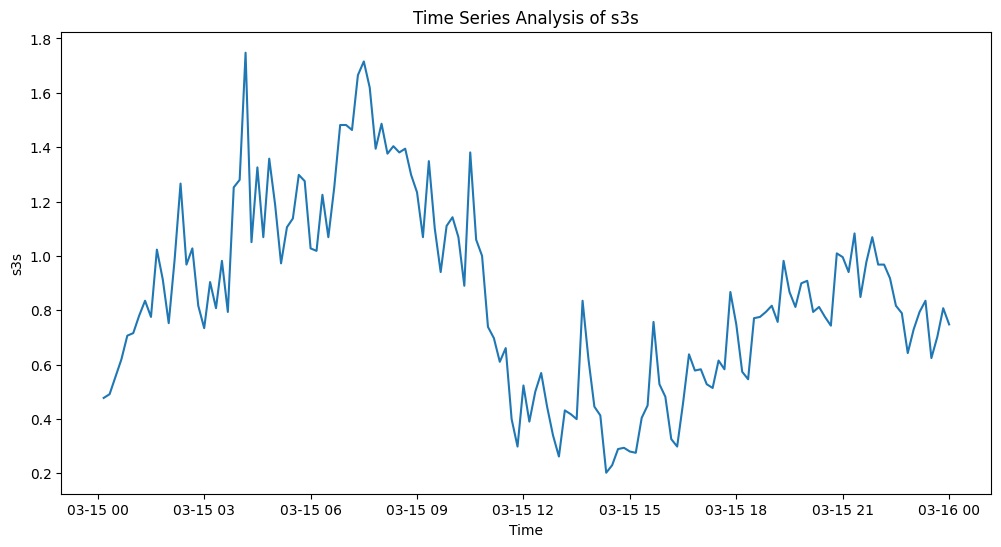

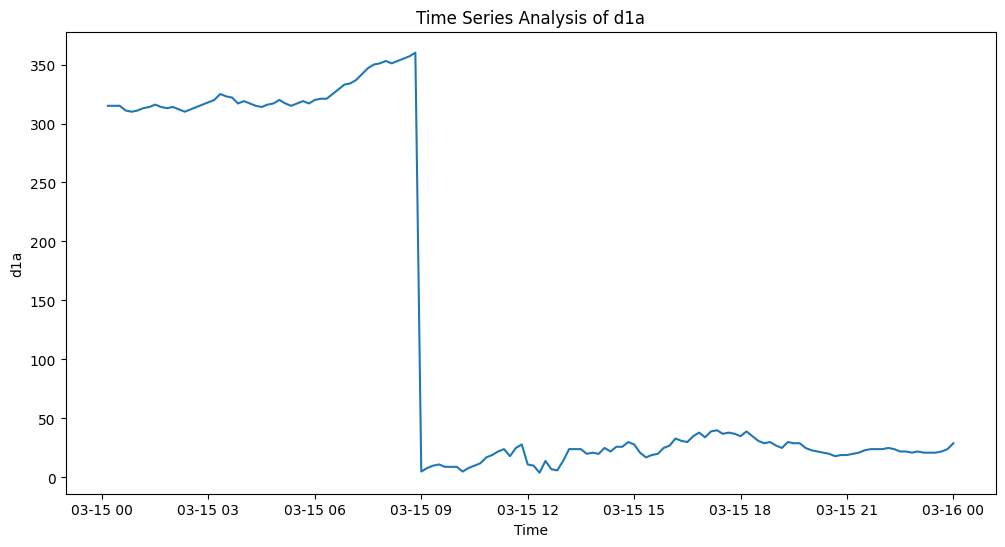

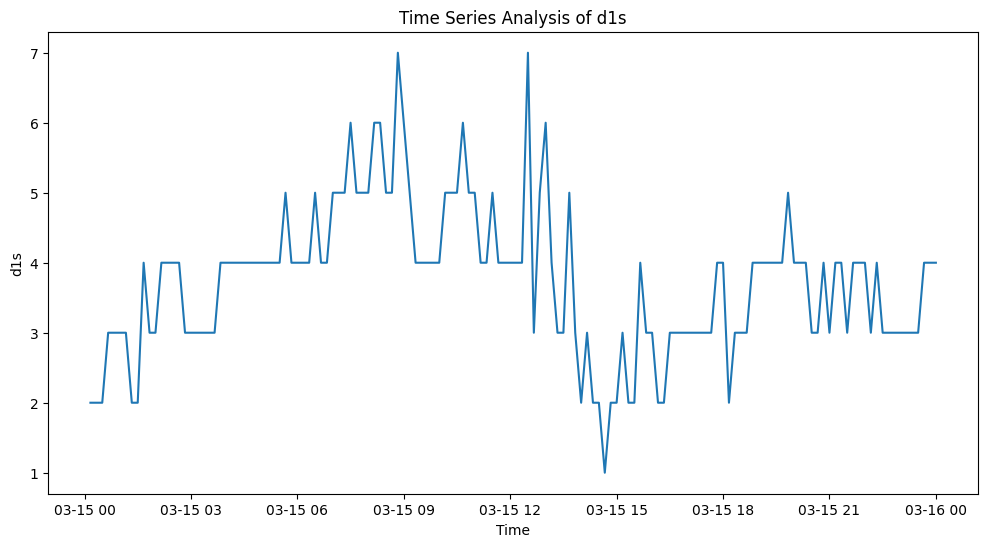

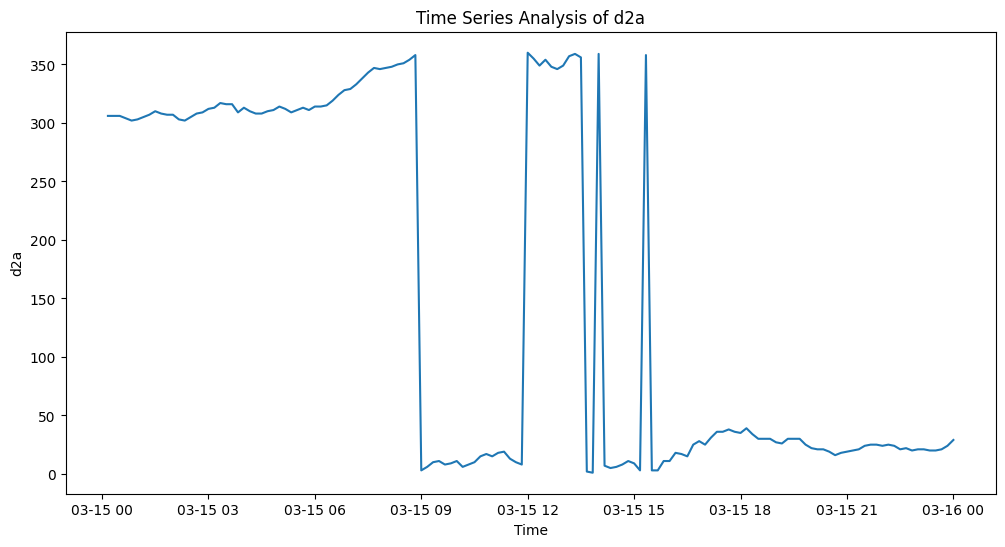

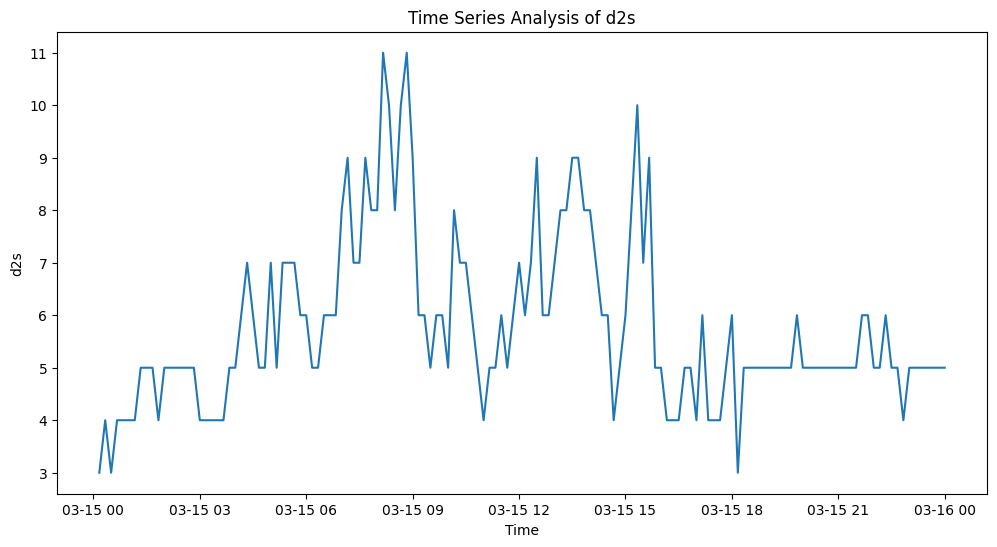

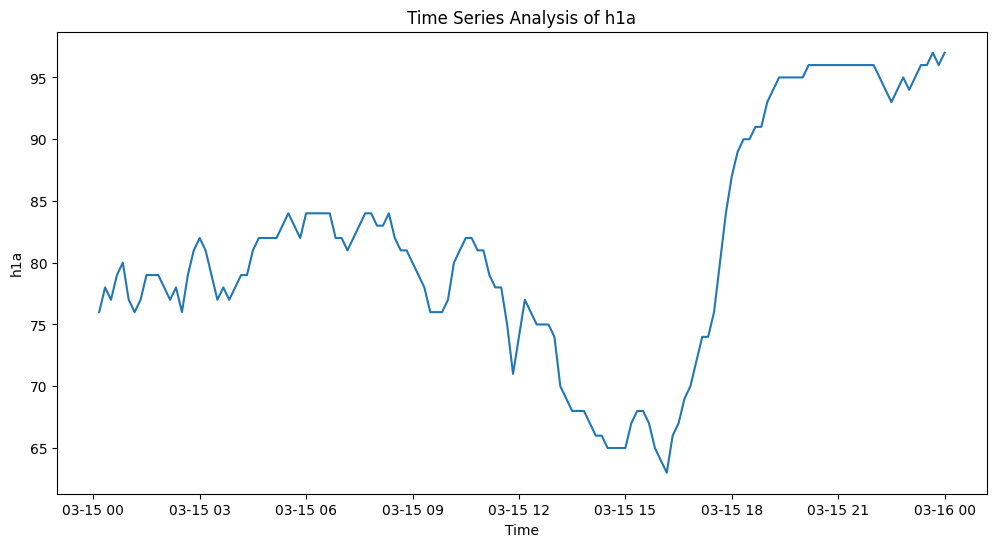

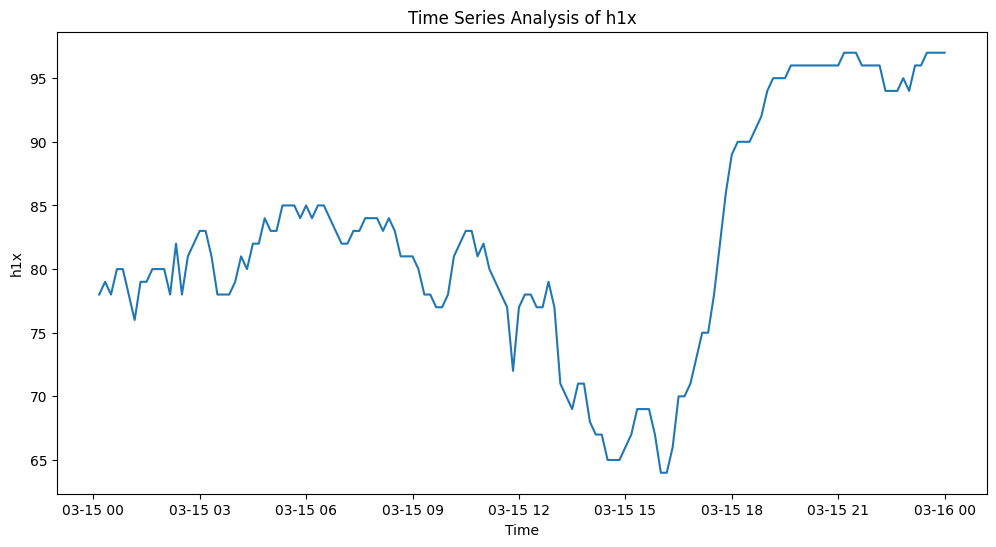

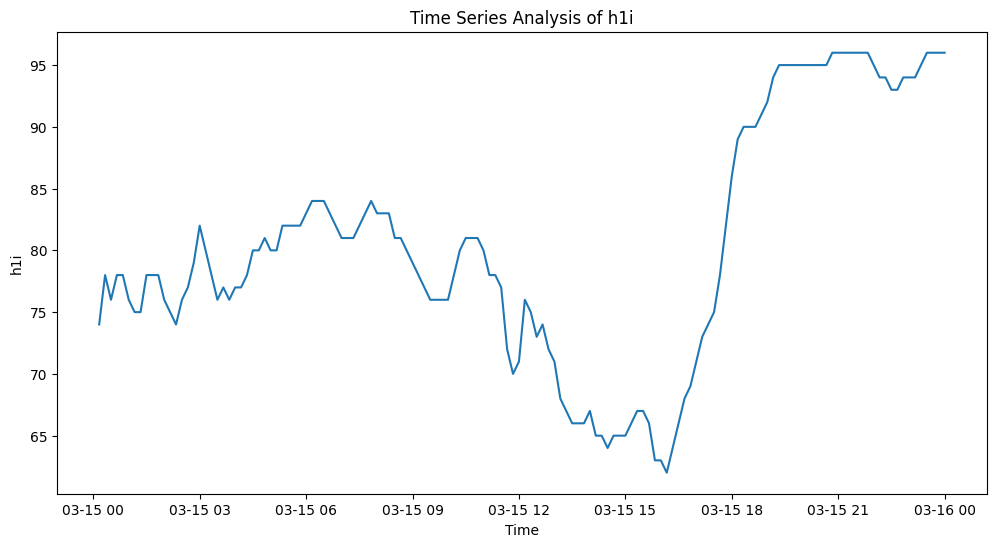

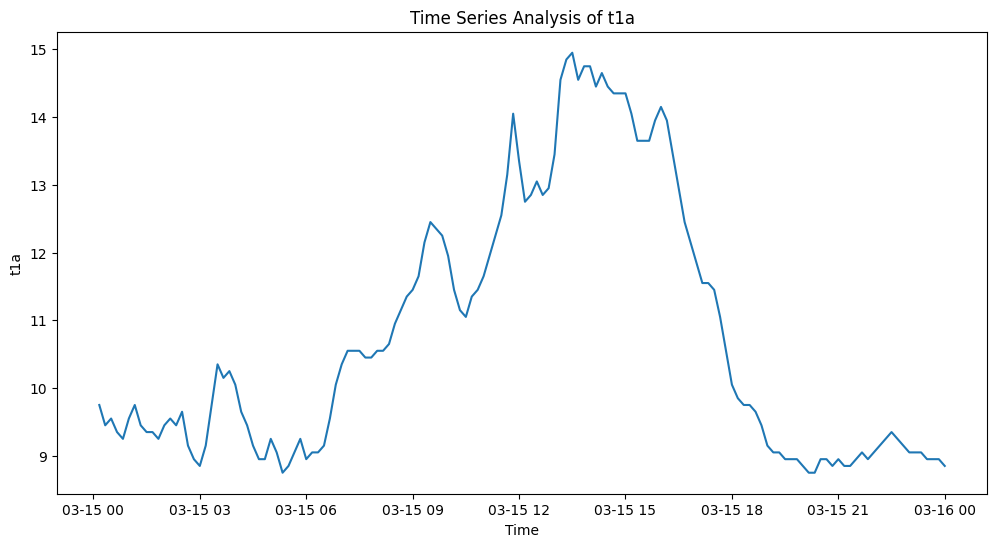

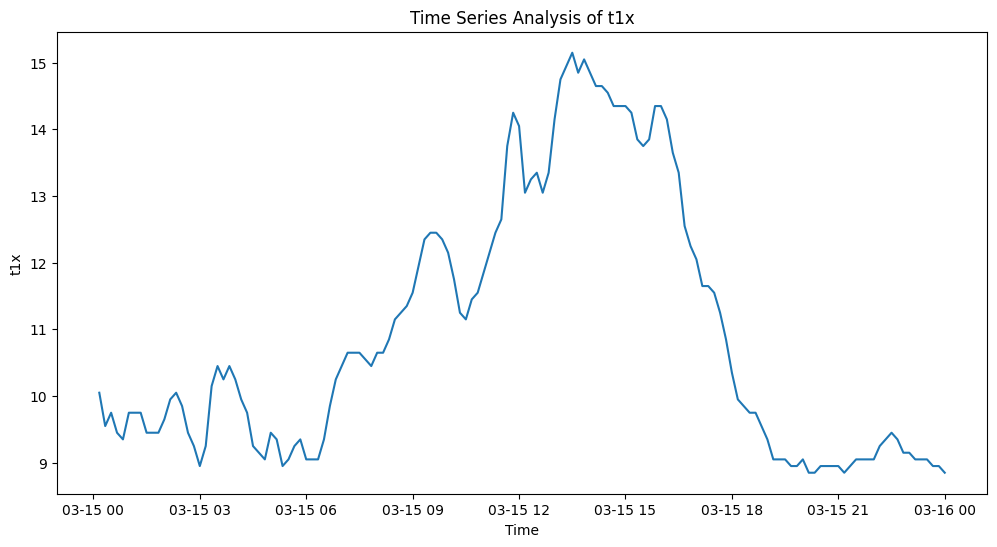

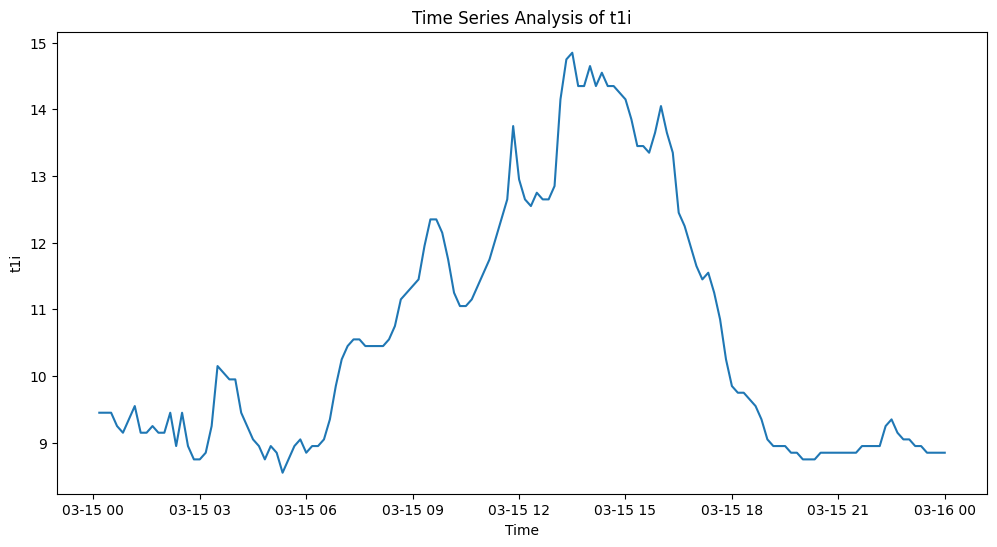

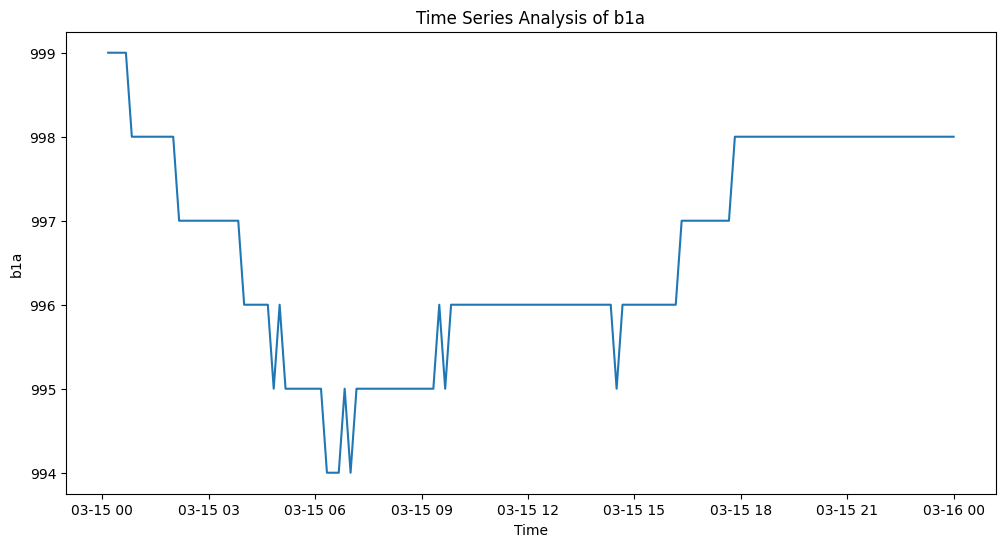

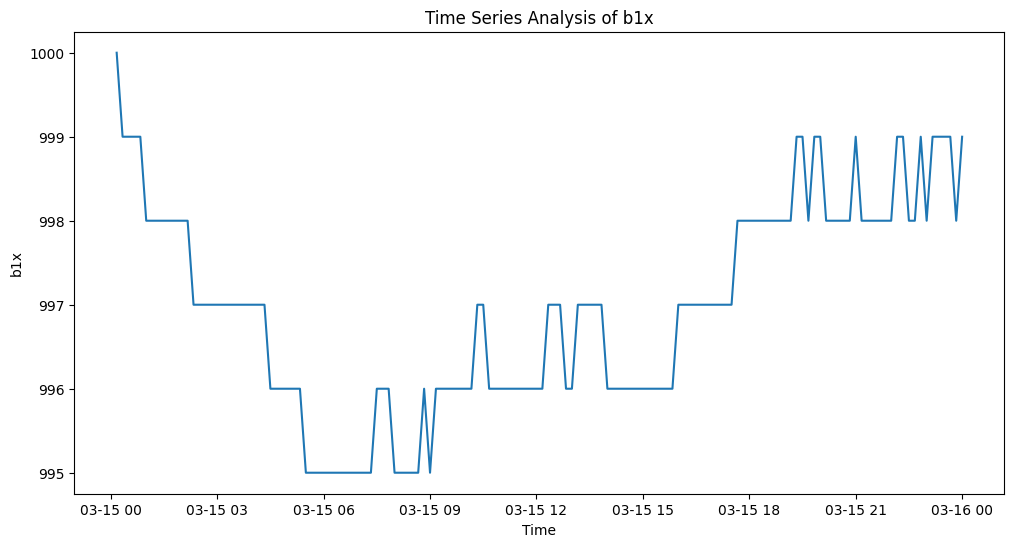

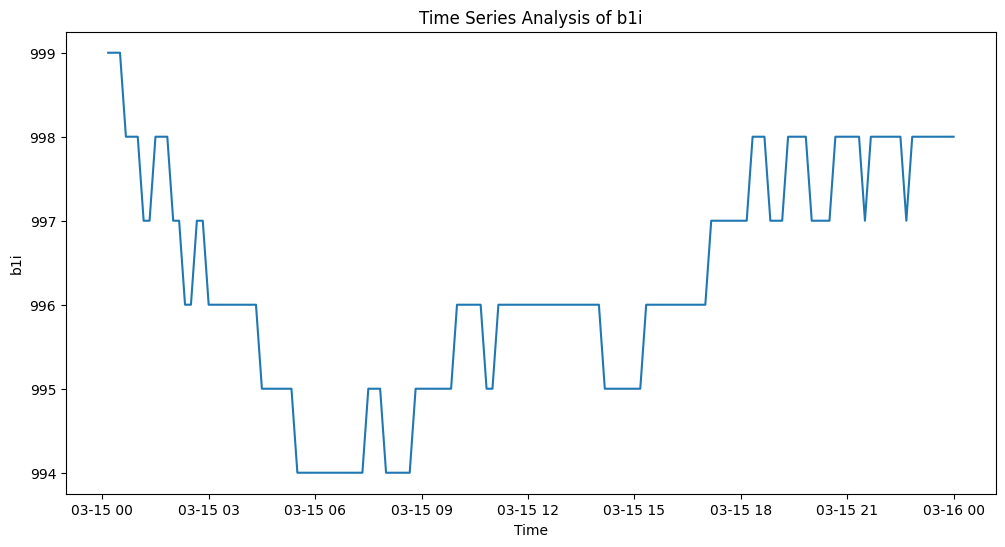

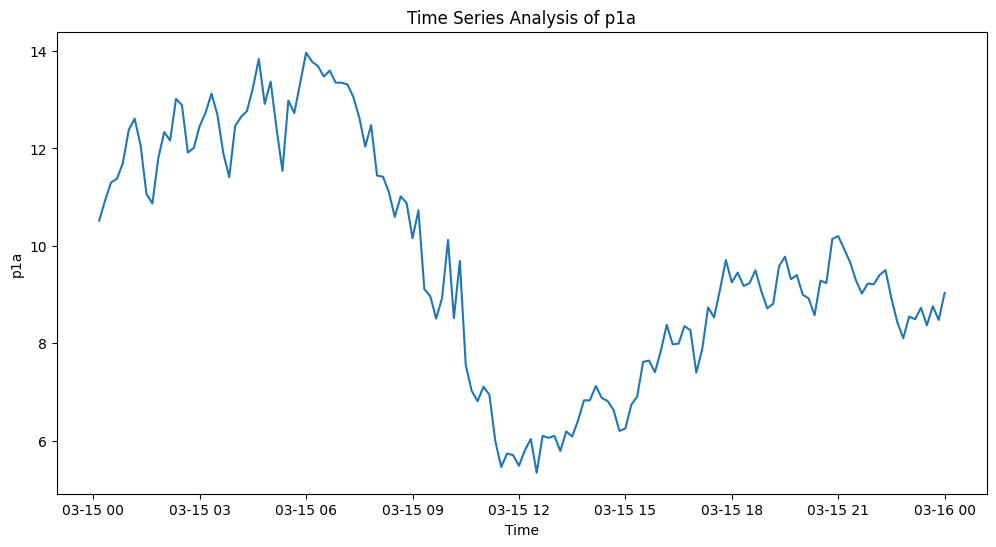

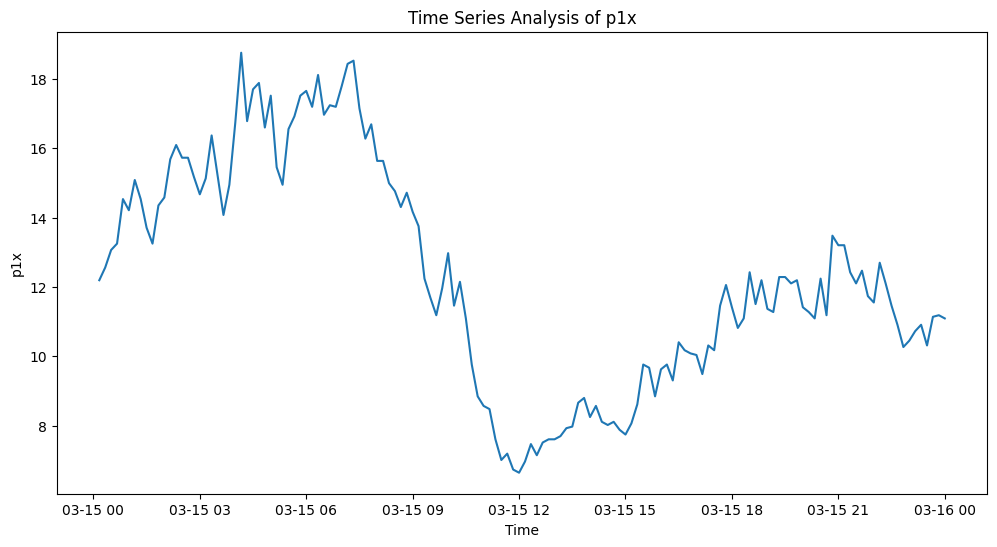

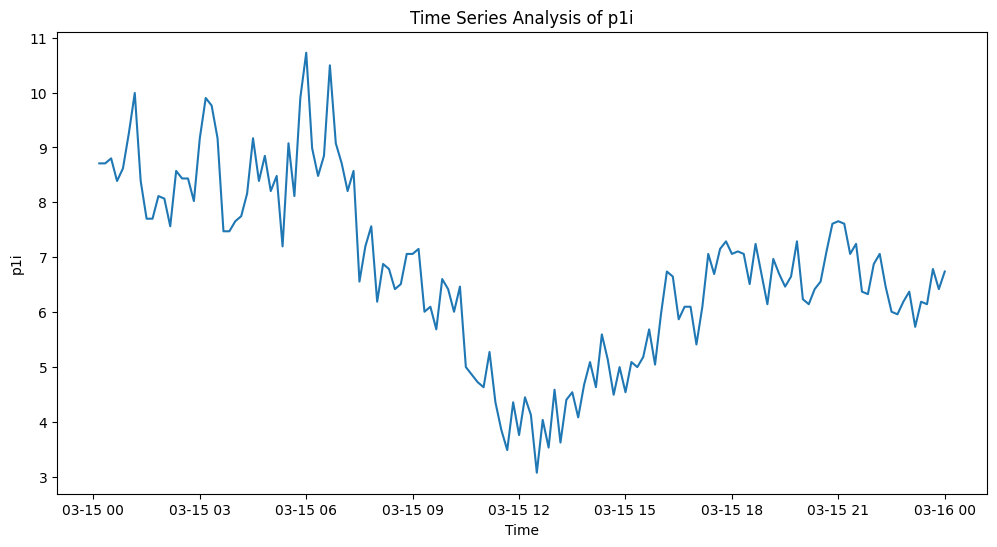

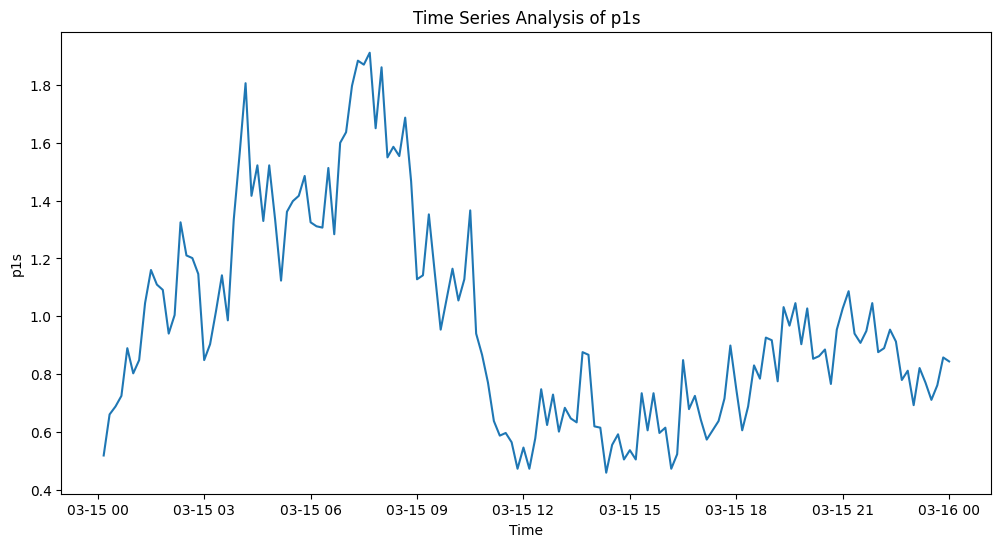

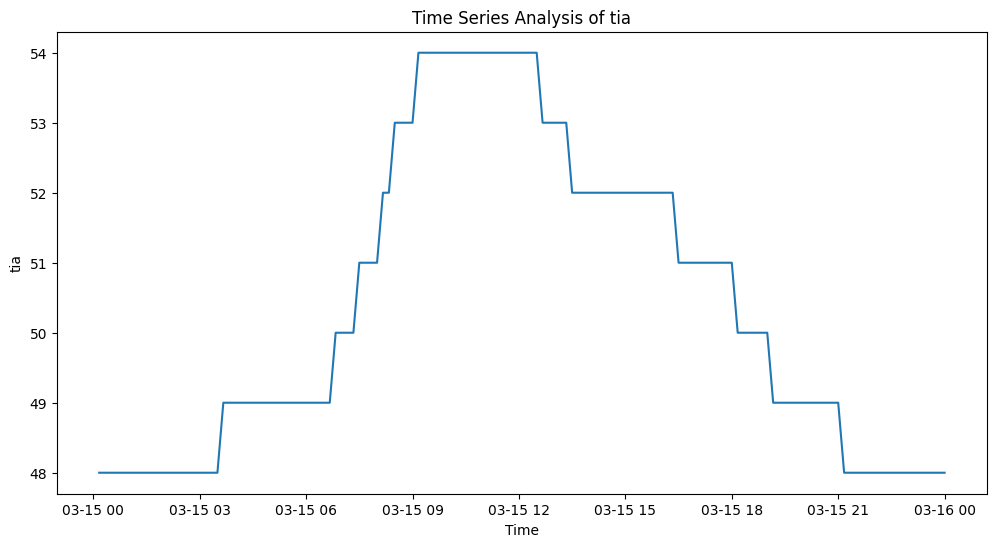

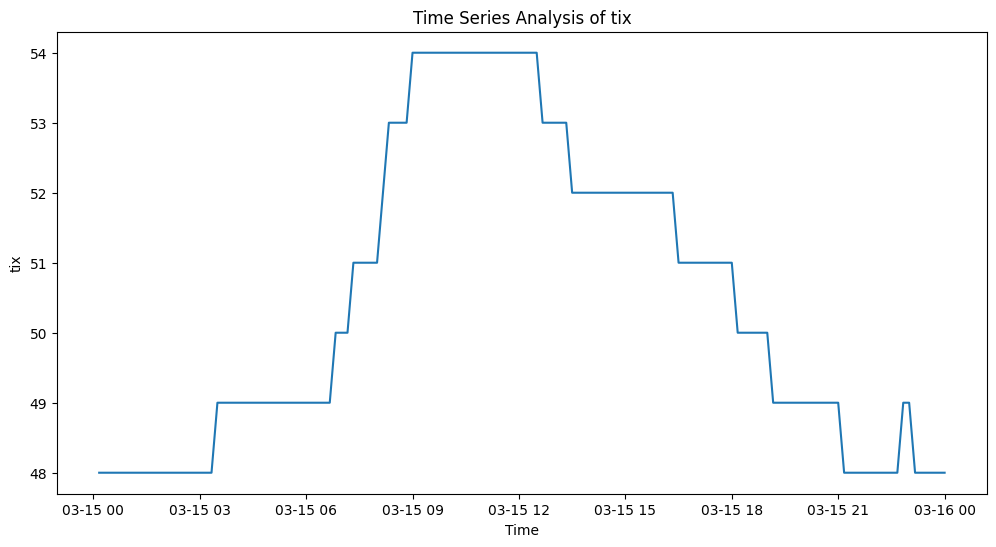

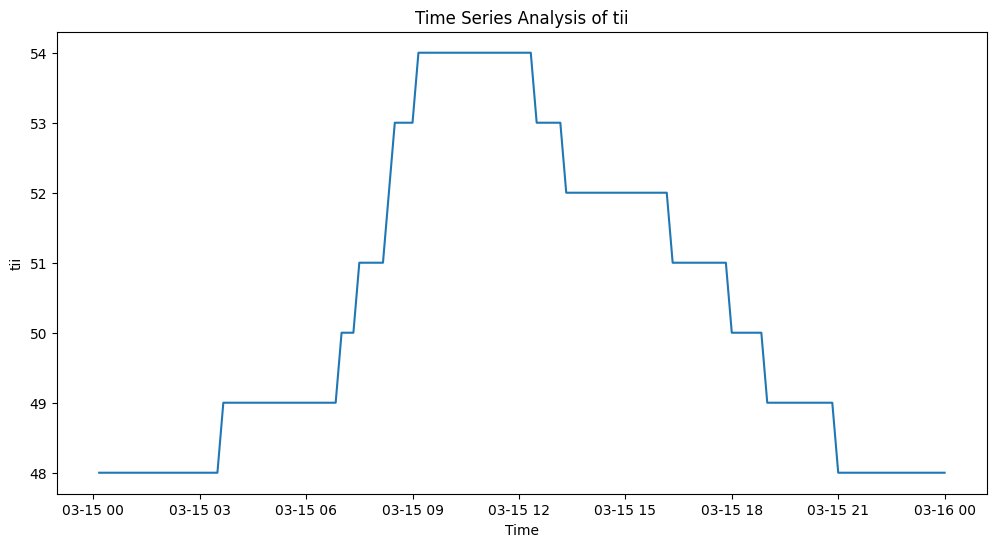

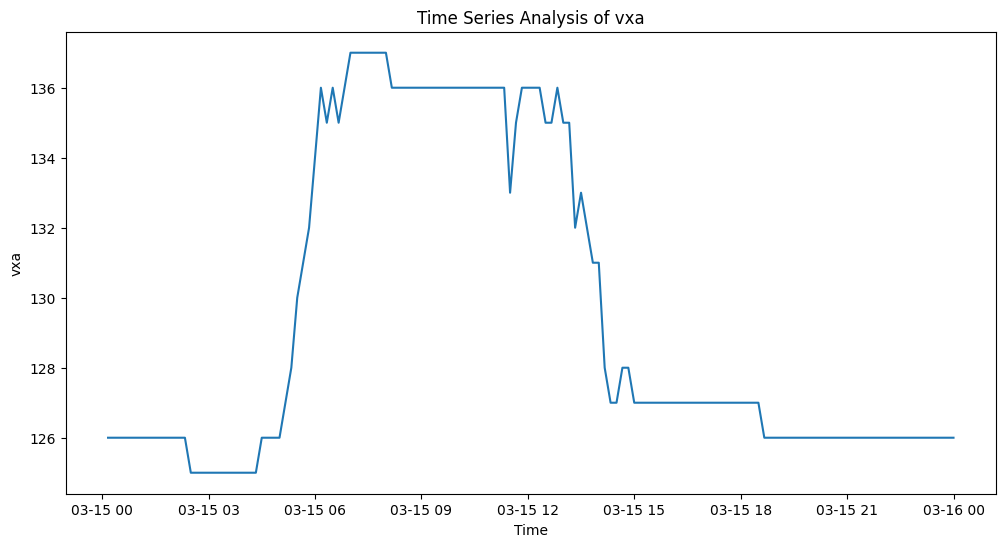

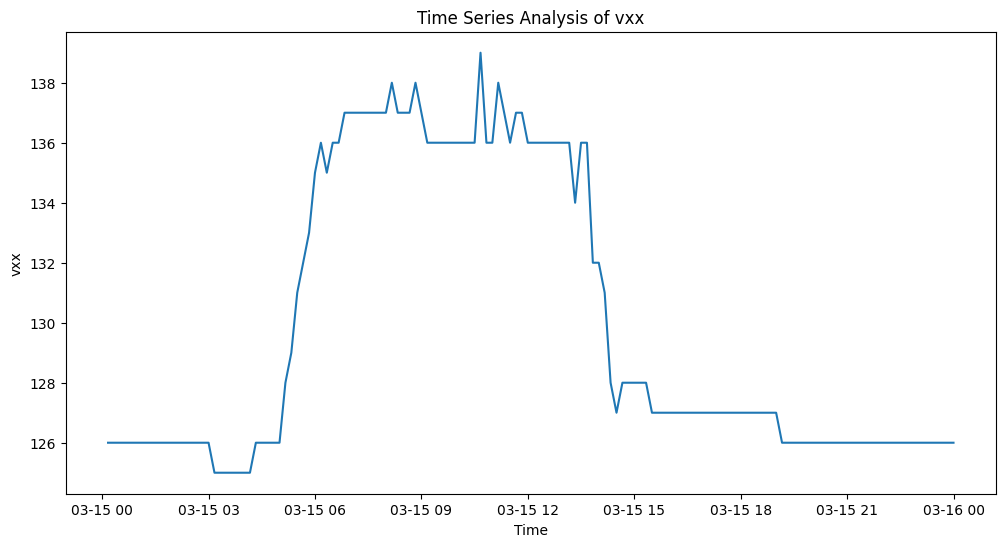

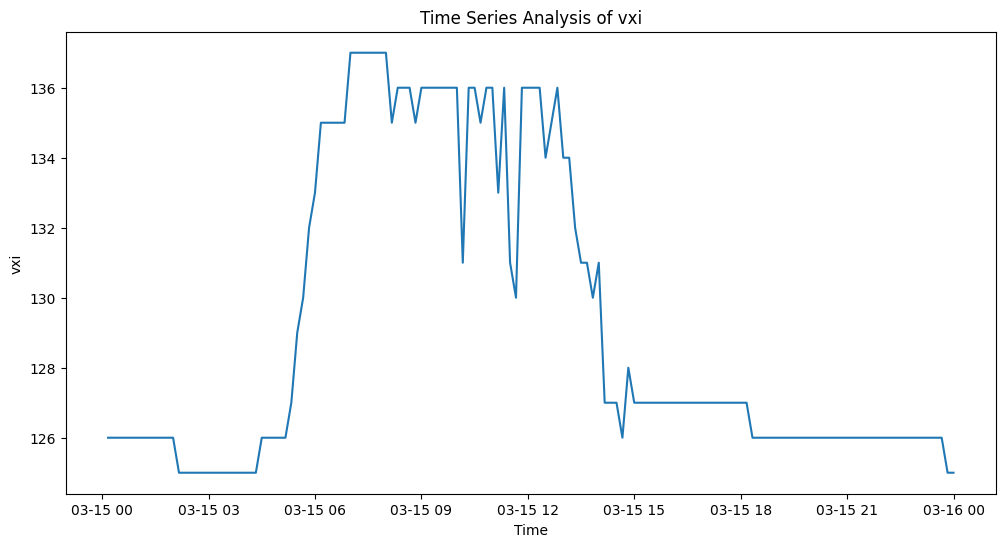

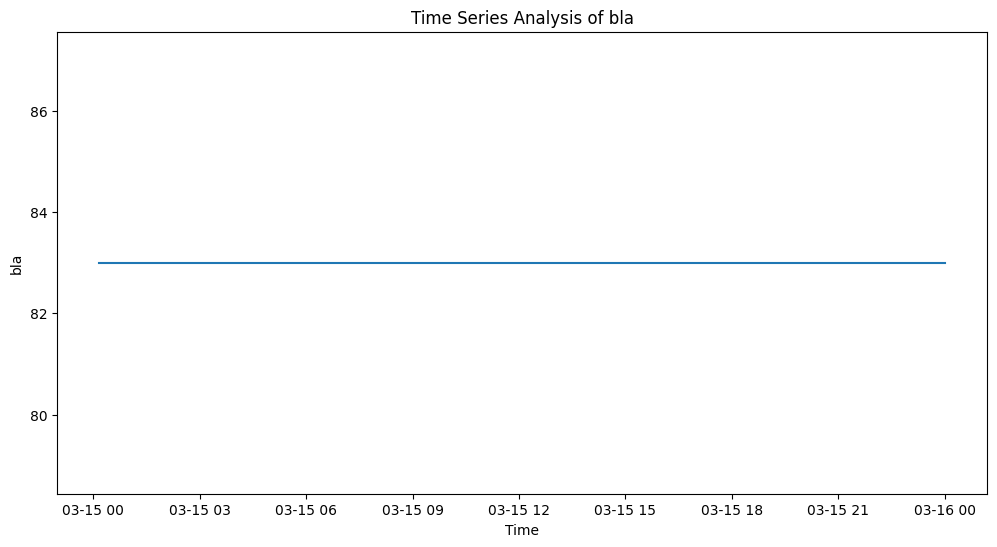

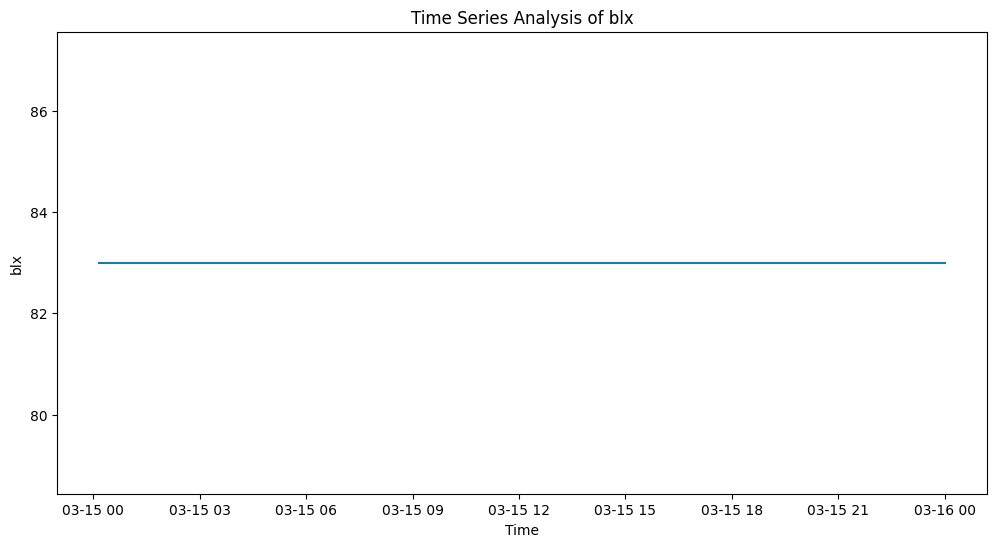

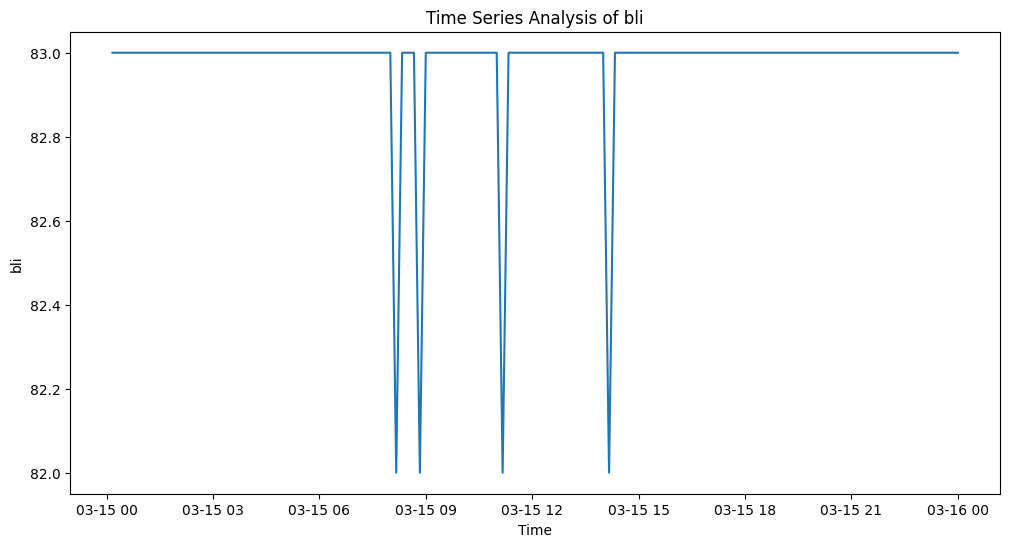

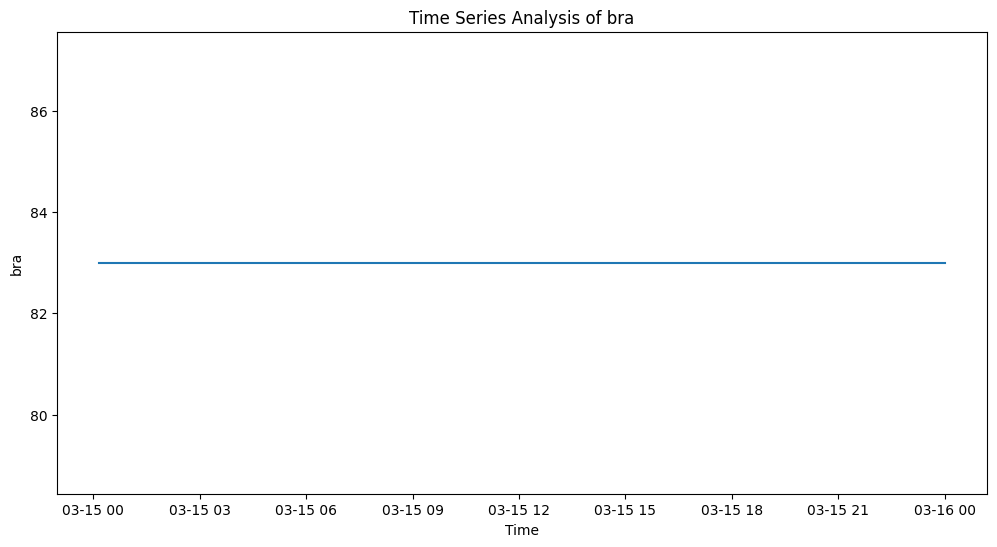

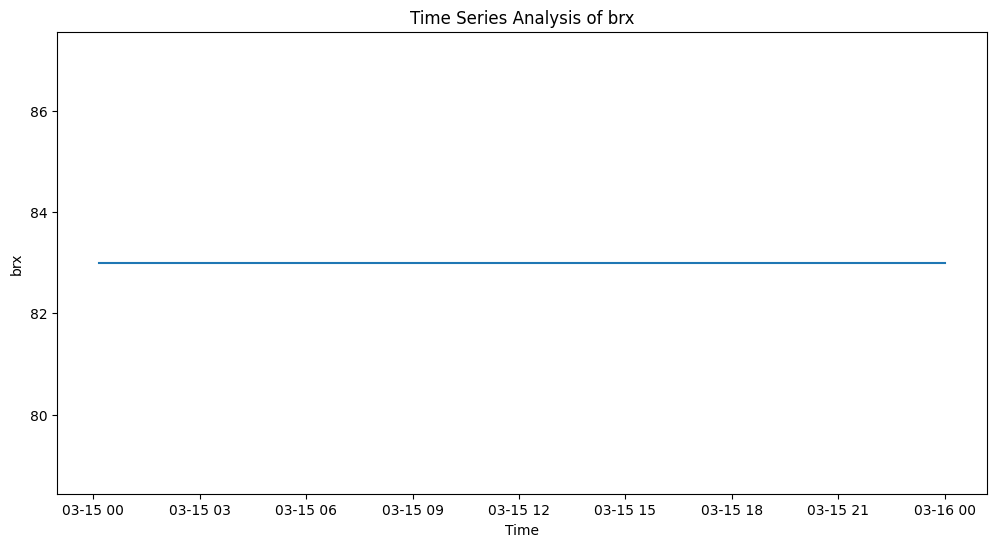

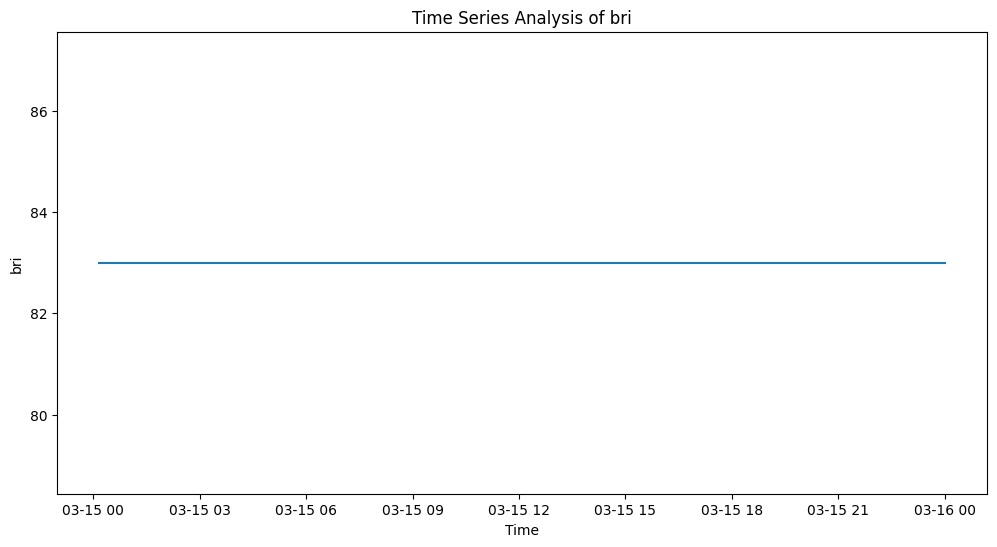

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

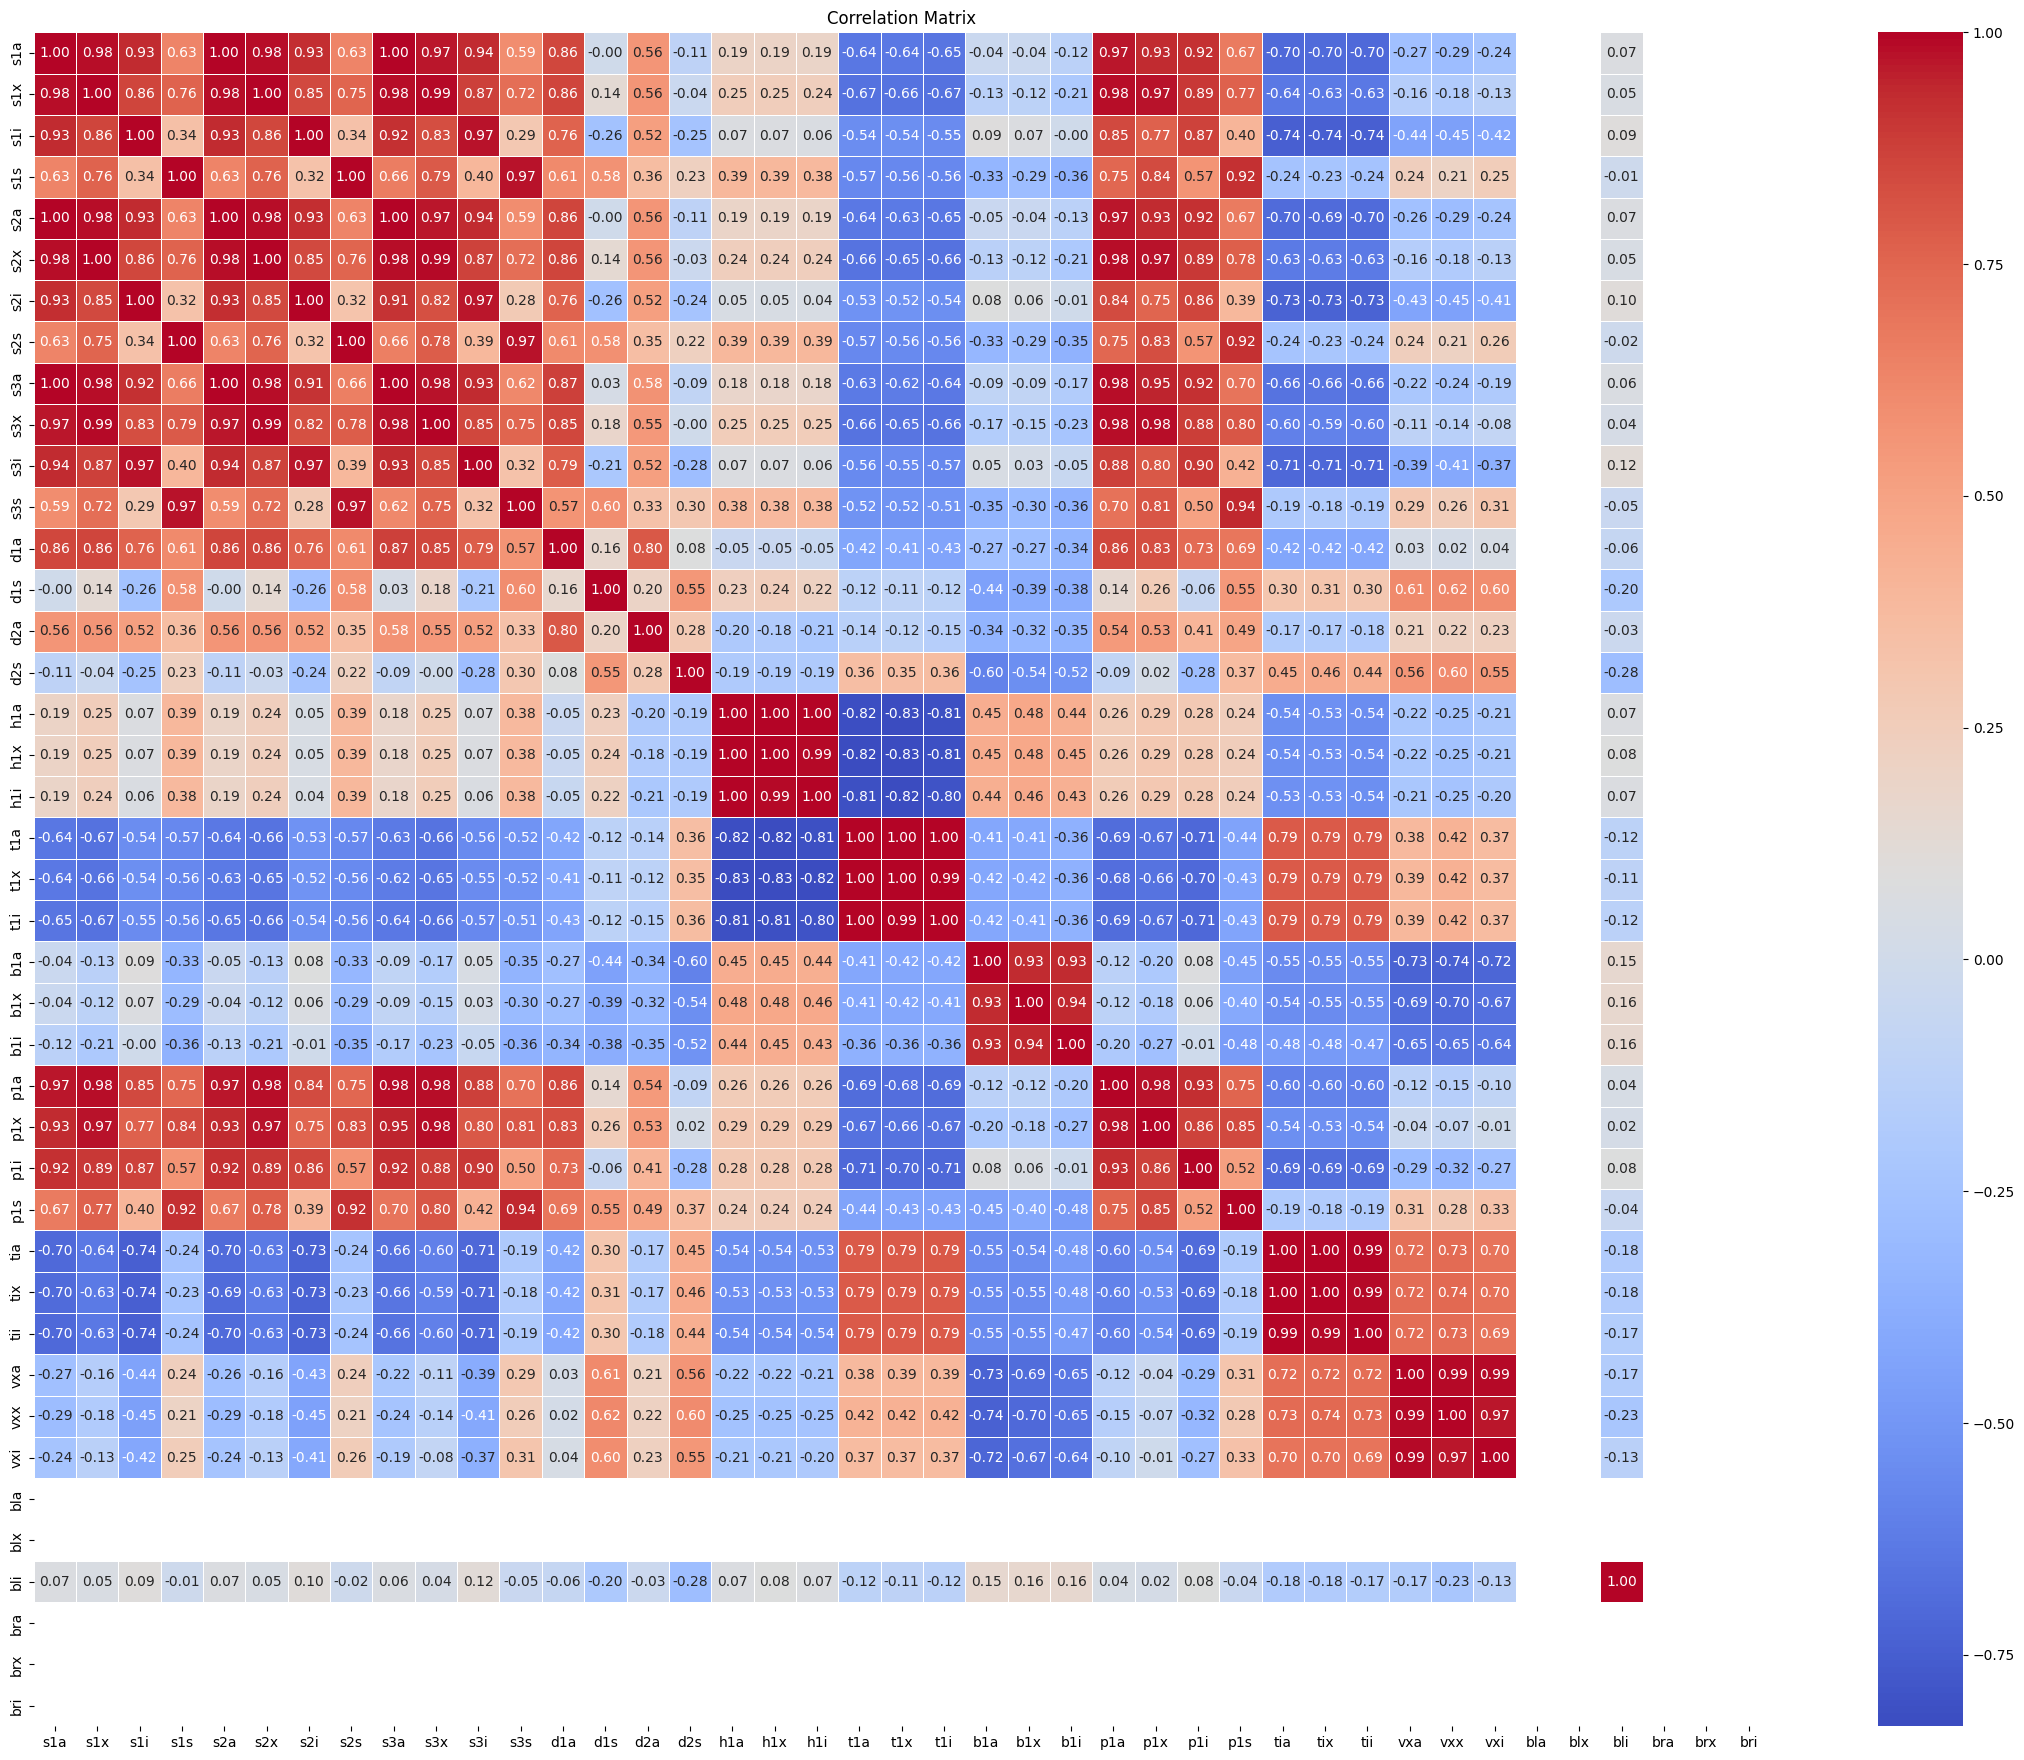

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

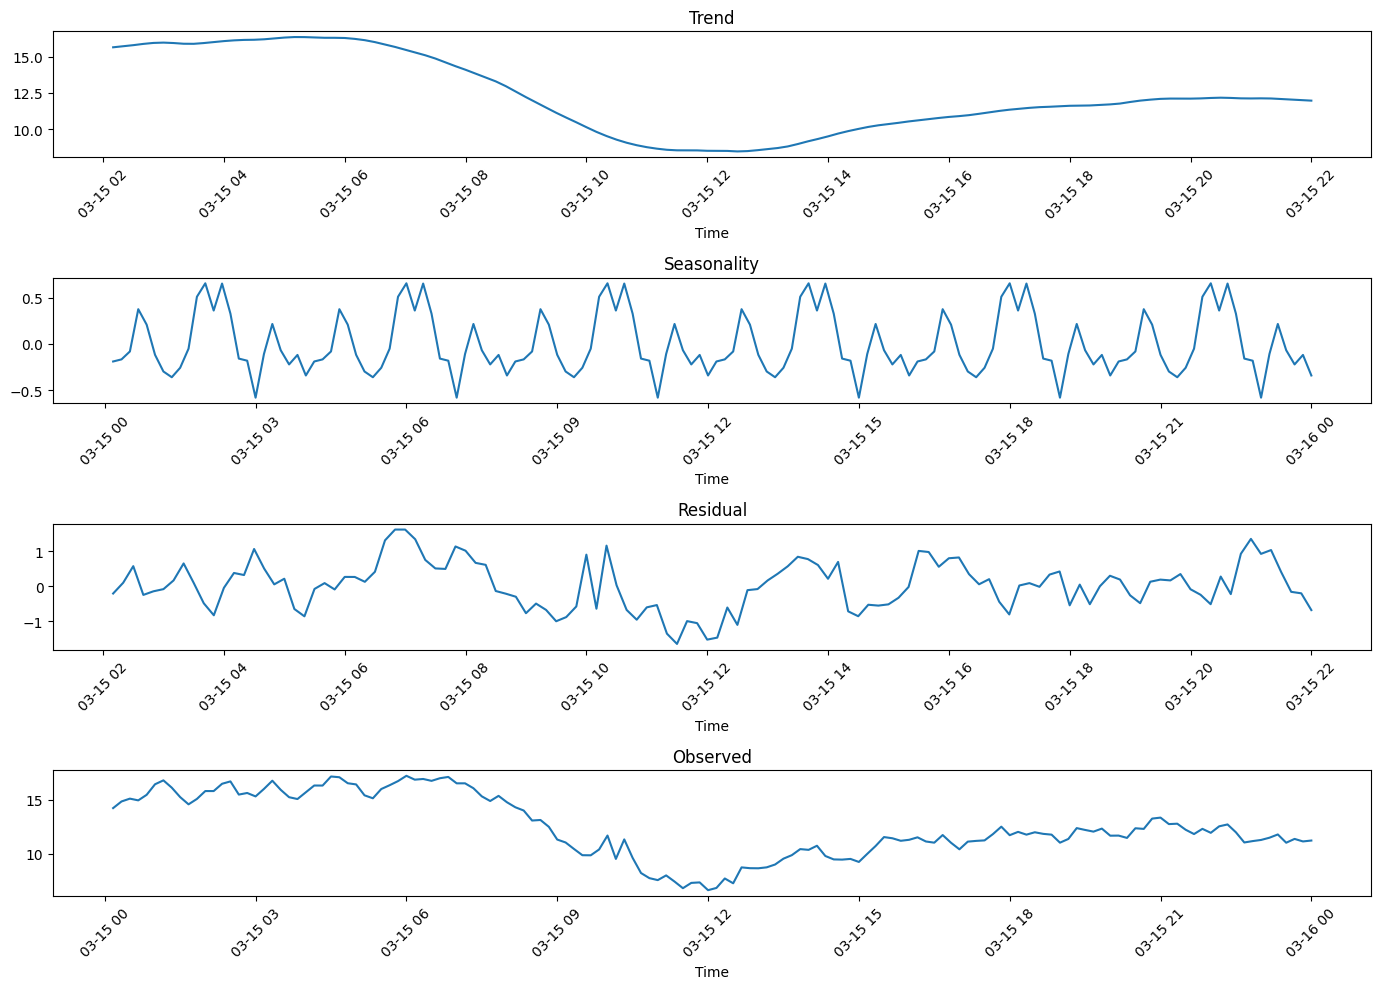

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


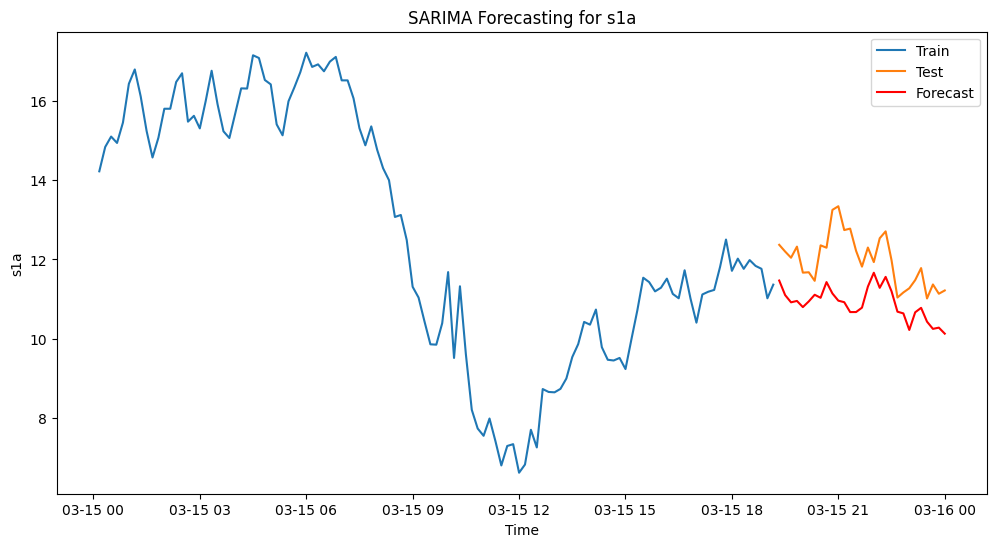

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()